MRINAL KADAM USC ID: 3135945534

# Time Series Classification

In [1]:
# Import all required packages and libraries

import pandas as pd 
import numpy as np

import math

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, accuracy_score, f1_score, roc_curve, auc, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.preprocessing import MinMaxScaler, label_binarize
from sklearn.utils import resample

import statsmodels.api as sm
import statsmodels.formula.api as smf

from IPython.display import Image

import warnings

# DATA CLEANING

# (a) Download the AReM data from: https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+\%28AReM\%29 . The dataset contains 7 folders that represent seven types of activities. Ineach folder, there are multiple files each of which represents an instant of a human performing an activity.1 Each file containis 6 time series collected from activities of the same person, which are called avg rss12, var rss12, avg rss13, var rss13, vg rss23, and ar rss23. There are 88 instances in the dataset, each of which contains 6 time series and each time series has 480 consecutive values.

The corrupted files have been identified, cleaned and corrected/imputed if required. They have been saved to the local folder again after cleaning.

bending2 dataset4,
cycling dataset9,14,
sitting dataset8,

In [2]:
# for i in range(1,8):
#     try:
#         print('\n')
#         print("Reading dataset{0}.".format(i))
#         df_bending_1 = pd.read_csv("../data/bending1/dataset{}.csv".format(i),header=4)
#         print(df_bending_1)
#         print('\n')
#         print(df_bending_1.isnull().sum())
#     except:
#         print("Can't read dataset{0}.".format(i))

In [3]:
# for i in range(1,7):
#     try:
#         print('\n')
#         print("Reading dataset{0}.".format(i))
#         df_bending_2 = pd.read_csv("../data/bending2/dataset{}.csv".format(i),header=4)
#         print(df_bending_2)
#         print('\n')
#         print(df_bending_2.isnull().sum())
#     except:
#         print("Can't read dataset{0}.".format(i))

In [4]:
# df_bending2_dataset4 = pd.read_csv("../data/bending2/dataset4.csv",header=4)
# df_bending2_dataset4

In [5]:
# df_bending2_dataset4_new = pd.DataFrame()
# df_bending2_dataset4_new = df_bending2_dataset4_new.fillna(0)

# for i in range(0,7):
#     df_bending2_dataset4_new[i] = df_bending2_dataset4['# Columns: time'].str.split(' ', -1, expand=True)[i]
    
# df_bending2_dataset4_new.rename({0:'# Columns: time',1:'avg_rss12',2:'var_rss12',3:'avg_rss13',4:'var_rss13',5:'avg_rss23',6:'var_rss23'},axis=1,inplace=True)
# df_bending2_dataset4 = df_bending2_dataset4_new
# df_bending2_dataset4.to_csv("../data/bending2/dataset4_new.csv")
# df_bending2_dataset4

In [6]:
# df_bending2_dataset4_new.isnull().sum()

In [7]:
# for i in range(1,16):
#     try:
#         print('\n')
#         print("Reading dataset{0}.".format(i))
#         df_cycling = pd.read_csv("../data/cycling/dataset{}.csv".format(i),header=4)
#         print(df_cycling)
#         print('\n')
#         print(df_cycling.isnull().sum())
#     except:
#         print("Can't read dataset{0}.".format(i))

In [8]:
# for i in range(1,16):
#     try:
#         print('\n')
#         print("Reading dataset{0}.".format(i))
#         df_lying = pd.read_csv("../data/lying/dataset{}.csv".format(i),header=4)
#         print(df_lying)
#         print('\n')
#         print(df_lying.isnull().sum())
#     except:
#         print("Can't read dataset{0}.".format(i))

In [9]:
# for i in range(1,16):
#     try:
#         print('\n')
#         print("Reading dataset{0}.".format(i))
#         df_sitting = pd.read_csv("../data/sitting/dataset{}.csv".format(i),header=4)
#         print(df_sitting)
#         print('\n')
#         print(df_sitting.isnull().sum())
#     except:
#         print("Can't read dataset{0}.".format(i))

In [10]:
# df_sitting_dataset8 = pd.read_csv("../data/sitting/dataset8.csv",header=4)
# df_sitting_dataset8.loc[len(df_sitting_dataset8)] = [120000,None,None,None,None,None,None]

# for c in range(1,7):
#     df_sitting_dataset8.iloc[479,c] = np.mean(df_sitting_dataset8.iloc[:,c])
    
# df_sitting_dataset8.to_csv("../data/sitting/dataset8_new.csv")

In [11]:
# for i in range(1,16):
#     try:
#         print('\n')
#         print("Reading dataset{0}.".format(i))
#         df_standing = pd.read_csv("../data/standing/dataset{}.csv".format(i),header=4)
#         print(df_standing)
#         print('\n')
#         print(df_standing.isnull().sum())
#     except:
#         print("Can't read dataset{0}.".format(i))

In [12]:
# for i in range(1,16):
#     try:
#         print('\n')
#         print("Reading dataset{0}.".format(i))
#         df_walking = pd.read_csv("../data/walking/dataset{}.csv".format(i),header=4)
#         print(df_walking)
#         print('\n')
#         print(df_walking.isnull().sum())
#     except:
#         print("Can't read dataset{0}.".format(i))

# (c) Feature Extraction

# (c) i. Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).

In time series classification, the time-domain features that are usually used include descriptive statistics such as minimum, maximum, mean, standard deviation and the various quartiles. Futhermore, skewness, kurtosis, first/last locations of minimum/maximum and frequencies of peaks in the amplitude in discrete Fourier Transform are also used.

# (c) ii. Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.

In [13]:
# Function to divide the time series into p approximately equal length time series, extract its features and return a data frame containing all of the extracted features 

def time_series_division(p):
    df_feature_extraction_list = []

    cols = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']

    for i in cols:
        for j in range(1, 16):
            try:
                df = pd.read_csv("../data/{0}/dataset{1}.csv".format(i, j), header=4)

                df_total = pd.DataFrame()
                df_split = np.array_split(df, p)

                for k in range(0, p):
                    df_split[k].reset_index(inplace=True)
                    df_split[k].drop(['index', '# Columns: time'], axis=1, inplace=True)
                    df_total = pd.concat([df_total, df_split[k]], axis=1)

                df_total.fillna(0, inplace=True)
                df = df_total.dropna(axis=1)

                df_feature_extraction = df.describe().T.reset_index(drop=True)
                df_feature_extraction.rename(columns={'50%': 'median'}, inplace=True)
                df_feature_extraction.rename(columns={'25%': '1st quart'}, inplace=True)
                df_feature_extraction.rename(columns={'75%': '3rd quart'}, inplace=True)
                df_feature_extraction = df_feature_extraction[
                    ['min', 'max', 'mean', 'median', 'std', '1st quart', '3rd quart']]

                dim = len(df_feature_extraction) * len(df_feature_extraction.columns)

                df_feature_extraction_array = df_feature_extraction.to_numpy()
                df_feature_extraction_array = df_feature_extraction_array.reshape(1, dim)

                df_feature_extraction_array = np.append(df_feature_extraction_array, i)
                df_feature_extraction_array = np.append(df_feature_extraction_array, j)

                cls = []

                for l in range(1, len(df_feature_extraction) + 1):
                    cls.append('min{0}'.format(l))
                    cls.append('max{0}'.format(l))
                    cls.append('mean{0}'.format(l))
                    cls.append('median{0}'.format(l))
                    cls.append('std{0}'.format(l))
                    cls.append('1st quart{0}'.format(l))
                    cls.append('3rd quart{0}'.format(l))

                cls.append('Activity')
                cls.append('File_No')

                df_feature_extraction_list.append(df_feature_extraction_array)

            except:
                continue

    df_feature_extraction_array_final = np.concatenate(df_feature_extraction_list, axis=0)

    df_feature_extraction_final = pd.DataFrame(df_feature_extraction_array_final.reshape(88, ((42 * p) + 2)), columns=cls)

    for c in df_feature_extraction_final.columns[0:(42 * p)]:
        df_feature_extraction_final[c] = df_feature_extraction_final[c].astype(float)

    return df_feature_extraction_final

In [14]:
# Original time series after feature extraction

df_feature_extraction_final = time_series_division(1)
df_feature_extraction_final

,min1,max1,mean1,median1,std1,1st quart1,3rd quart1,min2,max2,mean2,...,3rd quart5,min6,max6,mean6,median6,std6,1st quart6,3rd quart6,Activity,File_No
0,37.25,45.00,40.624792,40.50,1.476967,39.25,42.0000,0.0,1.30,0.358604,...,36.00,0.00,1.92,0.570583,0.43,0.582915,0.0000,1.3000,bending1,1
1,38.00,45.67,42.812812,42.50,1.435550,42.00,43.6700,0.0,1.22,0.372438,...,34.50,0.00,3.11,0.571083,0.43,0.601010,0.0000,1.3000,bending1,2
2,35.00,47.40,43.954500,44.33,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,36.50,0.00,1.79,0.493292,0.43,0.513506,0.0000,0.9400,bending1,3
3,33.00,47.75,42.179813,43.50,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,36.33,0.00,2.18,0.613521,0.50,0.524317,0.0000,1.0000,bending1,4
4,33.00,45.75,41.678063,41.75,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,31.25,0.00,1.79,0.383292,0.43,0.389164,0.0000,0.5000,bending1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,19.50,45.33,33.586875,34.25,4.650935,30.25,37.0000,0.0,14.67,4.576562,...,18.25,0.00,8.32,3.259729,3.11,1.640243,2.0500,4.3225,walking,11
84,19.75,45.50,34.322750,35.25,4.752477,31.00,38.0000,0.0,13.47,4.456333,...,17.75,0.00,9.67,3.432562,3.20,1.732727,2.1575,4.5650,walking,12
85,19.50,46.00,34.546229,35.25,4.842294,31.25,37.8125,0.0,12.47,4.371958,...,17.75,0.00,10.00,3.338125,3.08,1.656742,2.1600,4.3350,walking,13
86,23.50,46.25,34.873229,35.25,4.531720,31.75,38.2500,0.0,14.82,4.380583,...,18.00,0.00,9.51,3.424646,3.27,1.690960,2.1700,4.5000,walking,14


Normalization/Standardization of features was also tried but since there was no difference, I have chosen to go ahead with the features directly.

# (b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

In [15]:
# Function to divide the passed dataframe into train and test data

def train_test_split(df):
    df_train_1 = df.loc[(df.Activity.isin(['bending1','bending2']) & df.File_No.isin(['3','4','5','6','7']))]
    df_train_2 = df.loc[(df.Activity.isin(['cycling','lying','sitting','standing','walking']) & df.File_No.isin(['4','5','6','7','8','9','10','11','12','13','14','15']))]
    df_train = pd.concat([df_train_1,df_train_2],axis=0,ignore_index=True)
    df_train.drop(['File_No'],axis=1,inplace=True)
    
    x_train = df_train.iloc[:,0:len(df_train.columns)-1]
    y_train = df_train.iloc[:,-1].to_frame()
    
    df_test_1 = df.loc[(df.Activity.isin(['bending1','bending2']) & df.File_No.isin(['1','2']))]
    df_test_2 = df.loc[(df.Activity.isin(['cycling','lying','sitting','standing','walking']) & df.File_No.isin(['1','2','3']))]
    df_test = pd.concat([df_test_1,df_test_2],axis=0,ignore_index=True)
    df_test.drop(['File_No'],axis=1,inplace=True)  
    
    x_test = df_test.iloc[:,0:len(df_test.columns)-1]
    y_test = df_test.iloc[:,-1].to_frame()
    
    return x_train,y_train,x_test,y_test   

# (c) iii. Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python's bootstrapped or any other method to build a 90% bootstrap confidence interval for the standard deviation of each feature.

In [16]:
# Exact standard deviation of each of the time-domain features has been calculated

df_feature_extraction_final_std = df_feature_extraction_final.describe().loc['std']

# Each of the 88 samples have been repeated a 1000 times to get a big sample of data (bootstrapping/resampling)

sample_std = (df_feature_extraction_final.sample(frac=1, replace=True).describe().loc['std'].values for i in range(1000)) 

# A 90% (aplha=0.10) confidence interval has been built (with the help of the 5th and 95th percentile of the sample)

bootstrap_std_CI = [(round((sorted(s)[50]+sorted(s)[51])/2.0, 2), round((sorted(s)[950]+sorted(s)[951])/2.0, 2))\
                    for s in zip(*sample_std)]

pd.DataFrame(list(zip(df_feature_extraction_final_std.values, bootstrap_std_CI)), 
             index=df_feature_extraction_final_std.index, columns=['std', '90% Bootstrap CI'])

,std,90% Bootstrap CI
min1,9.569975,"(8.29, 10.84)"
max1,4.394362,"(3.33, 5.31)"
mean1,5.335718,"(4.71, 5.89)"
median1,5.440054,"(4.8, 6.01)"
std1,1.772166,"(1.57, 1.95)"
1st quart1,6.153590,"(5.6, 6.68)"
3rd quart1,5.138925,"(4.34, 5.84)"
min2,0.000000,"(0.0, 0.0)"
max2,5.062729,"(4.62, 5.41)"
mean2,1.574164,"(1.4, 1.71)"


# (c) iv. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).

In [17]:
x_train,y_train,x_test,y_test = train_test_split(df_feature_extraction_final)

df_train = pd.concat([x_train,y_train],axis=1)

In [18]:
df_graph = pd.DataFrame()

nums = [1,2,3,4,5,6]

for num in nums:
    df_train_sel = df_train[['min{0}'.format(num),'max{0}'.format(num),'mean{0}'.format(num),'median{0}'.format(num),'std{0}'.format(num),'1st quart{0}'.format(num),'3rd quart{0}'.format(num)]]
    df_graph = pd.concat([df_graph,df_train_sel],axis=1)

df_graph = pd.concat([df_graph,df_train.iloc[:,42]],axis=1)
    
# Binary classification - Bending VS Non-Bending

df_graph['bending_or_not'] = np.where(((df_graph['Activity']=='bending1') | (df_graph['Activity']=='bending2')) ,'yes','no')
df_graph.drop(['Activity'],axis=1,inplace=True)
df_graph

,min1,max1,mean1,median1,std1,1st quart1,3rd quart1,min2,max2,mean2,...,1st quart5,3rd quart5,min6,max6,mean6,median6,std6,1st quart6,3rd quart6,bending_or_not
0,35.00,47.40,43.954500,44.33,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,35.3625,36.50,0.00,1.79,0.493292,0.43,0.513506,0.0000,0.9400,yes
1,33.00,47.75,42.179813,43.50,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,30.4575,36.33,0.00,2.18,0.613521,0.50,0.524317,0.0000,1.0000,yes
2,33.00,45.75,41.678063,41.75,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,28.4575,31.25,0.00,1.79,0.383292,0.43,0.389164,0.0000,0.5000,yes
3,37.00,48.00,43.454958,43.25,1.386098,42.50,45.0000,0.0,1.58,0.378083,...,22.2500,24.00,0.00,5.26,0.679646,0.50,0.622534,0.4300,0.8700,yes
4,36.25,48.00,43.969125,44.50,1.618364,43.31,44.6700,0.0,1.50,0.413125,...,20.5000,23.75,0.00,2.96,0.555313,0.49,0.487826,0.0000,0.8300,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,19.50,45.33,33.586875,34.25,4.650935,30.25,37.0000,0.0,14.67,4.576562,...,13.7300,18.25,0.00,8.32,3.259729,3.11,1.640243,2.0500,4.3225,no
65,19.75,45.50,34.322750,35.25,4.752477,31.00,38.0000,0.0,13.47,4.456333,...,13.5000,17.75,0.00,9.67,3.432562,3.20,1.732727,2.1575,4.5650,no
66,19.50,46.00,34.546229,35.25,4.842294,31.25,37.8125,0.0,12.47,4.371958,...,14.0000,17.75,0.00,10.00,3.338125,3.08,1.656742,2.1600,4.3350,no
67,23.50,46.25,34.873229,35.25,4.531720,31.75,38.2500,0.0,14.82,4.380583,...,13.7500,18.00,0.00,9.51,3.424646,3.27,1.690960,2.1700,4.5000,no


Text(0.5, 1.0, 'Time-Domain Features')

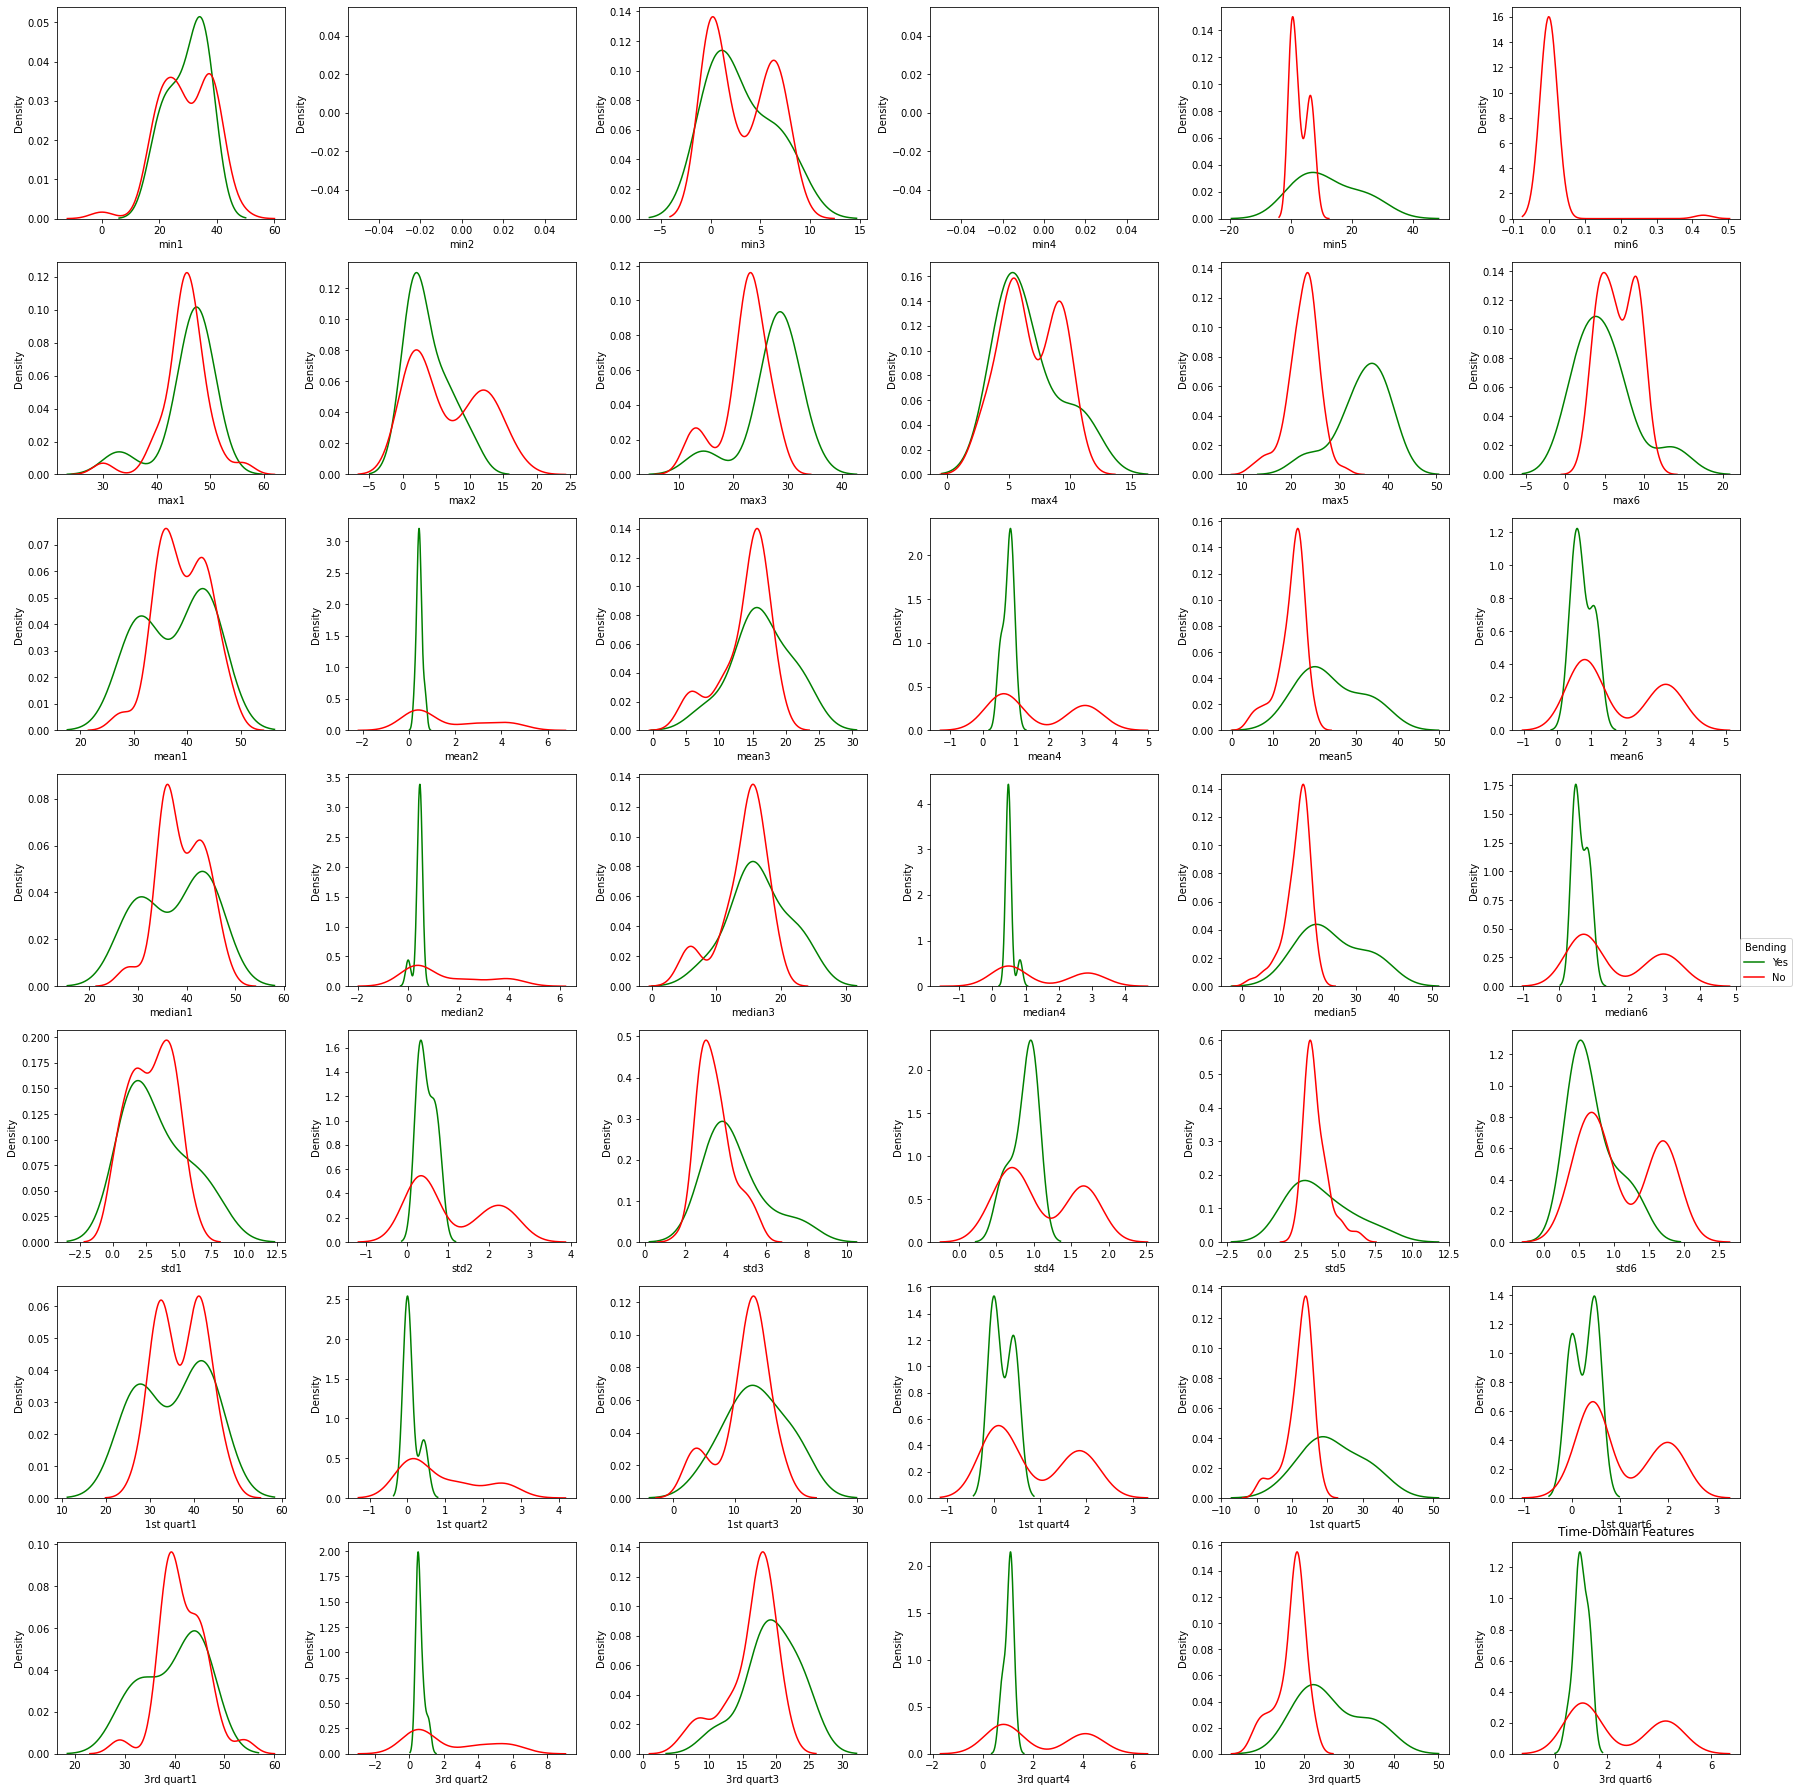

In [19]:
# Plot distribution plots for all time-domain features to check which ones would most probably be the most effective in binary classification

warnings.filterwarnings('ignore')

time_domain_features = ['min','max','mean','median','std','1st quart', '3rd quart']

plt.figure(figsize=(25,25))

for i, feature in enumerate(time_domain_features, start = 1):
    for j in range(1,7):    
        plt.subplot(7,6,6*i+j-6)
        sns.distplot(df_graph[df_graph['bending_or_not']=='yes'][feature+str(j)], kde = True, hist = False, color="green", label="Yes")
        sns.distplot(df_graph[df_graph['bending_or_not']=='no'][feature+str(j)] , kde = True, hist = False, color="red", label="No")
        if 6*i+j-6 == 24: 
            plt.legend(title = 'Bending',loc=(1,0))
plt.tight_layout()
plt.title('Time-Domain Features')

I have considered the target variable as 'bending' and plotted distribution plots of each of the time-domain features to depict the variation in the training data distribution. We should now choose the features that have a more obvious seperated distribution so that the classfication into different classes becomes easier. Based on this, I am selecting the mean, median and first quartile as the three most important time-domain features.

# (d) Binary Classification Using Logistic Regression

# (d) i. Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities.

In [20]:
df_graph_1 = pd.DataFrame()

nums = [1,2,6]

for num in nums:
    df_train_sel = df_train[['mean{0}'.format(num),'median{0}'.format(num),'1st quart{0}'.format(num)]]
    df_graph_1 = pd.concat([df_graph_1,df_train_sel],axis=1)

df_graph_1 = pd.concat([df_graph_1,df_train.iloc[:,42]],axis=1)
    
df_graph_1['bending_or_not'] = np.where(((df_graph_1['Activity']=='bending1') | (df_graph_1['Activity']=='bending2')) ,'yes','no')
df_graph_1.drop(['Activity'],axis=1,inplace=True)
df_graph_1

,mean1,median1,1st quart1,mean2,median2,1st quart2,mean6,median6,1st quart6,bending_or_not
0,43.954500,44.33,43.00,0.426250,0.470,0.00,0.493292,0.43,0.0000,yes
1,42.179813,43.50,39.15,0.696042,0.500,0.00,0.613521,0.50,0.0000,yes
2,41.678063,41.75,41.33,0.535979,0.500,0.43,0.383292,0.43,0.0000,yes
3,43.454958,43.25,42.50,0.378083,0.470,0.00,0.679646,0.50,0.4300,yes
4,43.969125,44.50,43.31,0.413125,0.470,0.43,0.555313,0.49,0.0000,yes
...,...,...,...,...,...,...,...,...,...,...
64,33.586875,34.25,30.25,4.576562,4.260,2.87,3.259729,3.11,2.0500,no
65,34.322750,35.25,31.00,4.456333,3.900,2.49,3.432562,3.20,2.1575,no
66,34.546229,35.25,31.25,4.371958,4.135,2.49,3.338125,3.08,2.1600,no
67,34.873229,35.25,31.75,4.380583,3.925,2.50,3.424646,3.27,2.1700,no


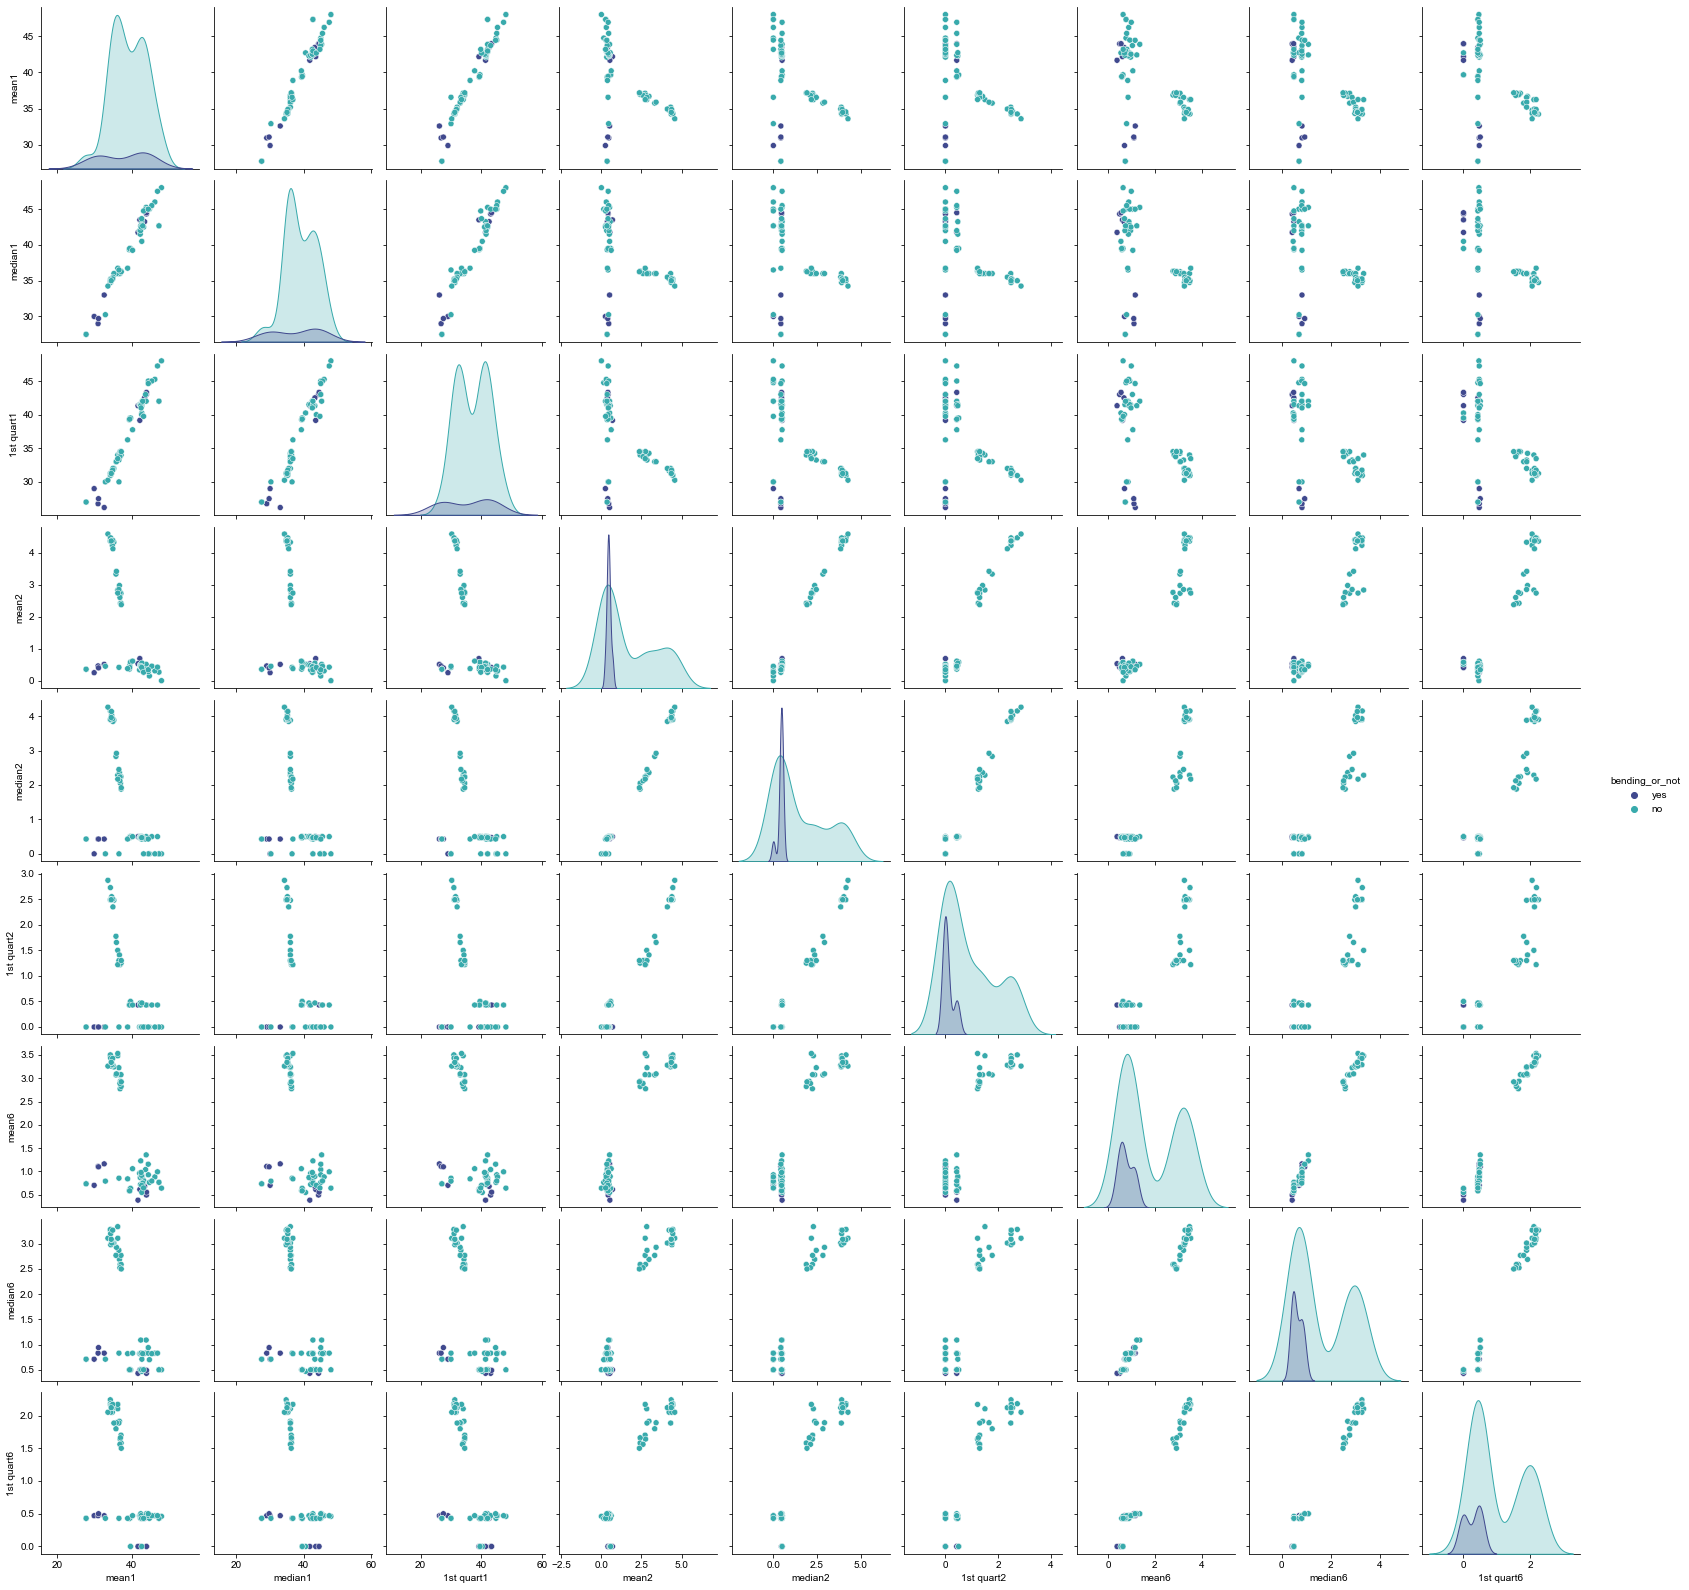

In [21]:
# Using the pairplot function of the seaborn library, plot graphs between all pairs of variables

sns.pairplot(df_graph_1, hue='bending_or_not', palette='mako')
sns.set(rc = {'figure.figsize':(20,20)})

# (d) ii. Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 1(d)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 12. Do you see any considerable difference in the results with those of 1(d)i?

In [22]:
# Break the time series into two equal legth time series

df_feature_extraction_final = time_series_division(2)
x_train,y_train,x_test,y_test = train_test_split(df_feature_extraction_final)
df_train = pd.concat([x_train,y_train],axis=1)

df_graph_2 = pd.DataFrame()

nums = [1,2,12]

for num in nums:
    df_train_sel = df_train[['mean{0}'.format(num),'median{0}'.format(num),'1st quart{0}'.format(num)]]
    df_graph_2 = pd.concat([df_graph_2,df_train_sel],axis=1)

df_graph_2 = pd.concat([df_graph_2,df_train.iloc[:,84]],axis=1)
    
df_graph_2['bending_or_not'] = np.where(((df_graph_2['Activity']=='bending1') | (df_graph_2['Activity']=='bending2')) ,'yes','no')
df_graph_2.drop(['Activity'],axis=1,inplace=True)
df_graph_2

,mean1,median1,1st quart1,mean2,median2,1st quart2,mean12,median12,1st quart12,bending_or_not
0,44.057167,44.500,43.2500,0.381042,0.470,0.0000,0.388333,0.000,0.0000,yes
1,43.278875,45.000,42.0000,0.673292,0.485,0.0000,0.586083,0.470,0.0000,yes
2,41.621208,42.330,39.6525,0.623083,0.500,0.4300,0.347500,0.430,0.0000,yes
3,44.117042,45.000,43.5000,0.250042,0.000,0.0000,0.543875,0.500,0.4300,yes
4,43.486208,43.710,42.3300,0.378667,0.470,0.0000,0.585750,0.500,0.4225,yes
...,...,...,...,...,...,...,...,...,...,...
64,33.334500,34.000,29.9375,4.408083,4.195,2.8675,3.290292,3.155,2.0500,no
65,34.036750,34.415,30.7500,4.778292,4.030,2.8600,3.321417,3.155,2.0500,no
66,34.033875,35.000,30.9375,4.574625,4.470,2.7500,3.432208,3.255,2.1600,no
67,34.920792,35.330,32.2500,4.177958,3.865,2.4900,3.418667,3.350,2.1700,no


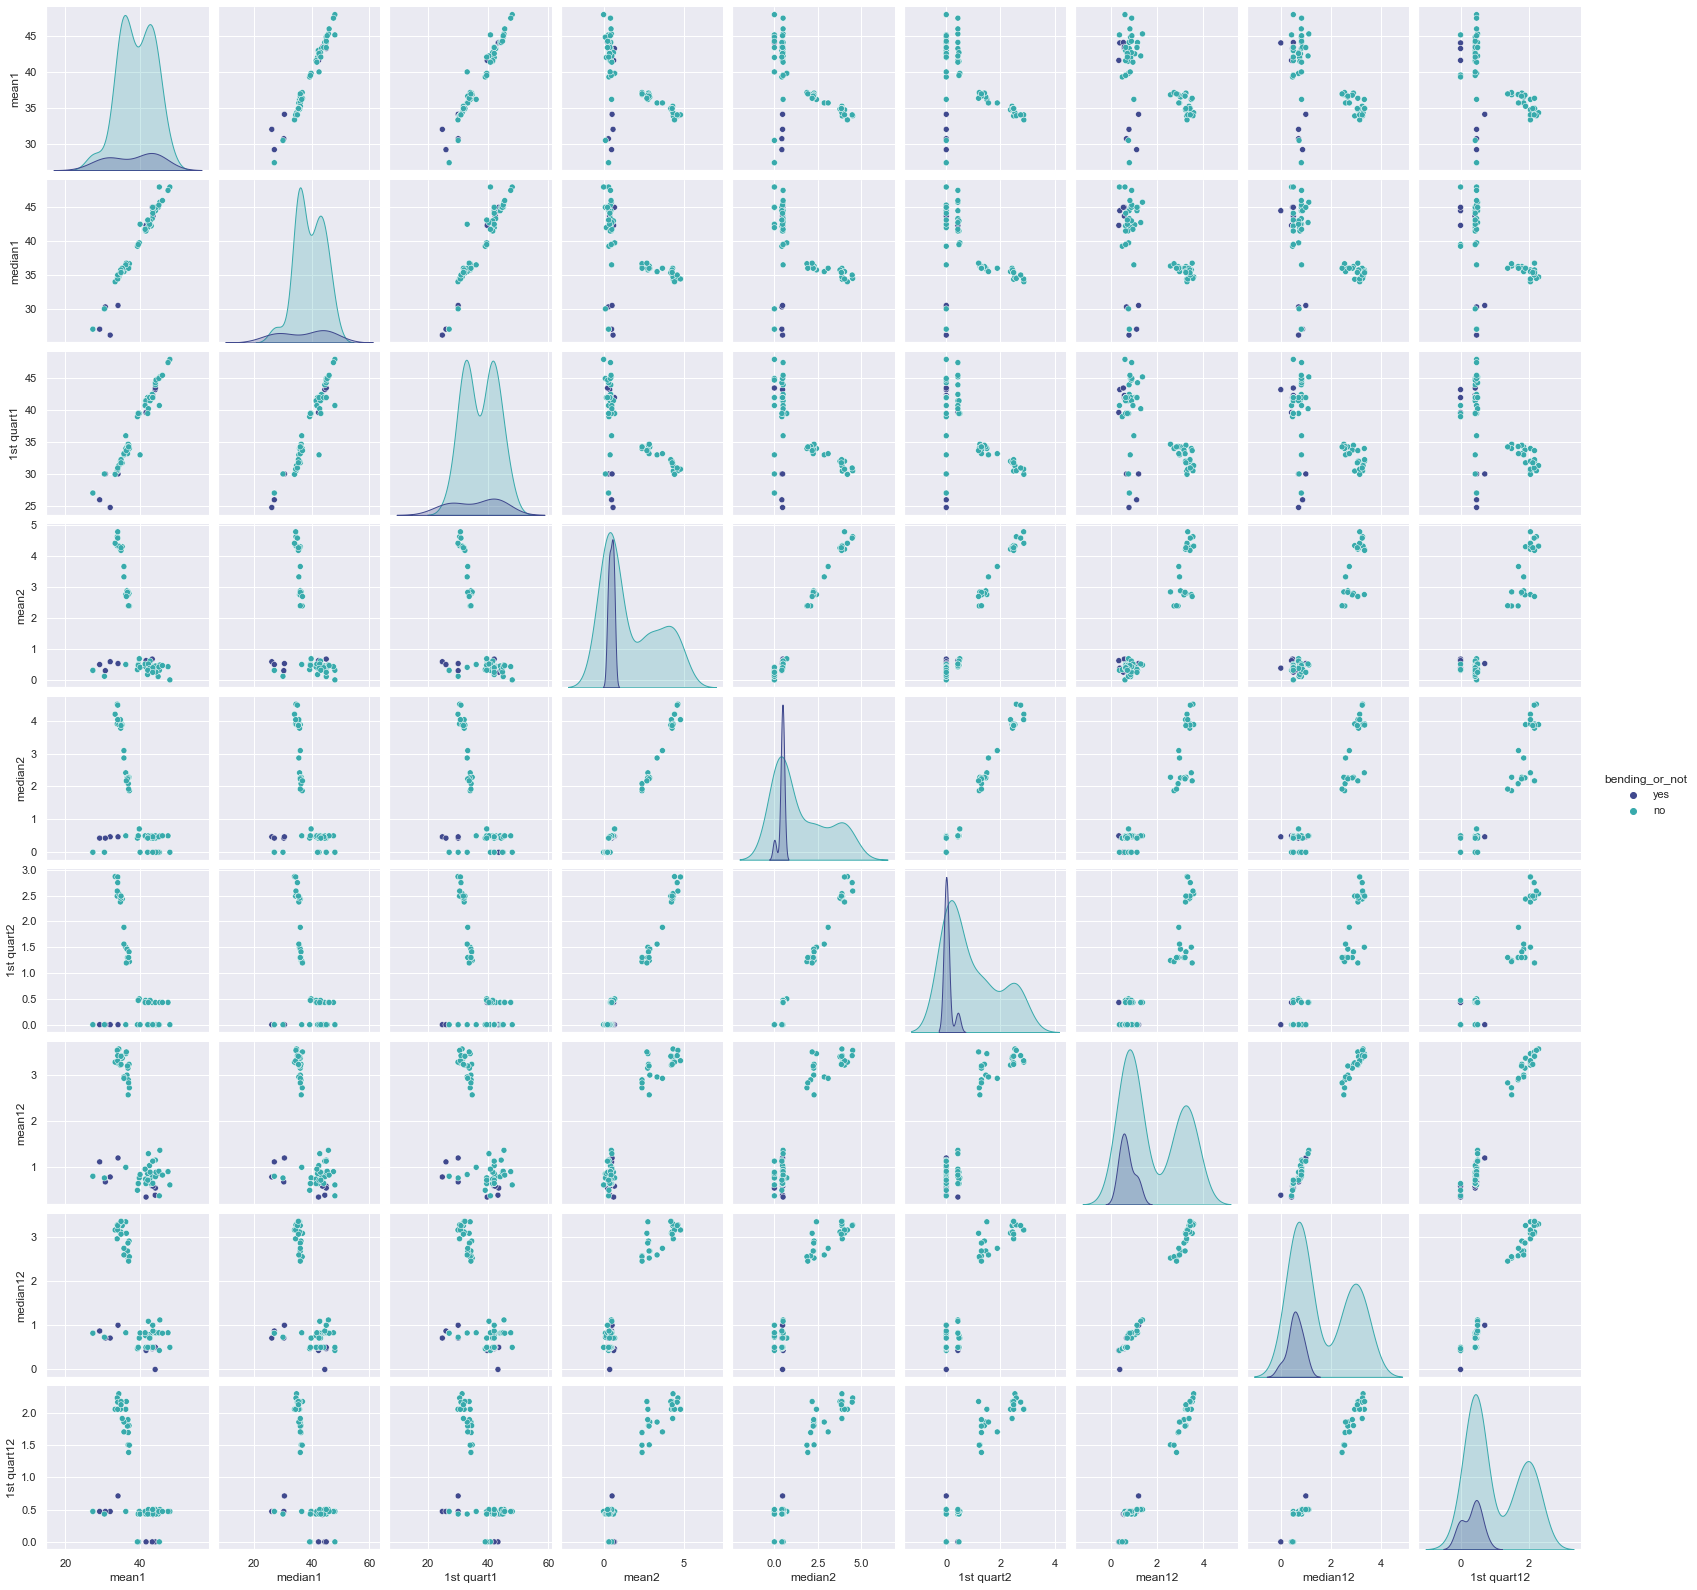

In [23]:
# Using the pairplot function of the seaborn library, plot graphs between all pairs of variables

sns.pairplot(df_graph_2, hue='bending_or_not', palette='mako')
sns.set(rc = {'figure.figsize':(20,20)})

There is no considerable difference in the results as compared to those of 1(d) i.

# (d) iii. Break each time series in your training set into l belonging to {1,2,...20} time series of approximately equal length and use logistic regression to solve the binary classification problem, using time-domain features. Remember that breaking each of the time series does not change the number of instances. It only changes the number of features for each instance. Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l and refit a logistic regression model using your pruned set of features. Alternatively, you can use backward selection using sklearn.feature selection or glm in R. Use 5-fold cross-validation to determine the best value of the pair (l,p), where p is the number of features used in recursive feature elimination. Explain what the right way and the wrong way are to perform cross-validation in this problem. Obviously, use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratified cross validation. Research what it means and use it if needed.

In [24]:
# Recursive Feature Elimination Cross Validation (RFECV)

warnings.filterwarnings('ignore')

result_dict = {}

# Finding out the best l

for l in range(1,21):
    df_feature_extraction_final = time_series_division(l)

    df_feature_extraction_final_sel = pd.DataFrame()

    # Considering only the three most important time-domain features selected above
    
    for c in df_feature_extraction_final.columns:
        if (('mean' in c) or ('median' in c) or ('1st quart' in c)):
            df_feature_extraction_final_sel = pd.concat([df_feature_extraction_final_sel,df_feature_extraction_final[[c]]],axis=1)

    df_feature_extraction_final_sel = pd.concat([df_feature_extraction_final_sel,df_feature_extraction_final.iloc[:,(len(df_feature_extraction_final.columns)-2):(len(df_feature_extraction_final.columns))]],axis=1)
    
    x_train,y_train,x_test,y_test = train_test_split(df_feature_extraction_final_sel) 

    y_train['Activity'] = np.where(((y_train['Activity']=='bending1') | (y_train['Activity']=='bending2')),1,0)
    y_test['Activity'] = np.where(((y_test['Activity']=='bending1') | (y_test['Activity']=='bending2')),1,0)
    
      
    log_reg = LogisticRegression(C=10000, max_iter=10000, random_state=100)

    min_features_to_select = 1
    rfecv = RFECV(log_reg, step=1, cv=StratifiedKFold(n_splits=5), min_features_to_select=min_features_to_select)

    result = rfecv.fit(x_train,y_train)

    result_dict[l] = [result.n_features_, result.support_, result.ranking_, max(result.grid_scores_)]

In [25]:
print("Maximum grid score out of all of them is:")

no_of_optimal_features = []
max_grid_scores = []

for i in range(1,21):
    no_of_optimal_features.append(result_dict[i][0])
    max_grid_scores.append(result_dict[i][3])
    
print(np.max(max_grid_scores))

print('\n')
print("l at which we got maximum grid score is:")
l = np.argmax(max_grid_scores)+1
print(l)

print('\n')
print("p at which we got maximum grid score is:")
p = no_of_optimal_features[(np.argmax(max_grid_scores))]
print(p)

print('\n')
print("Best (l,p) pair is:",(l,p))

features_used = np.array(result_dict[l][1])
df_features_used = pd.DataFrame(features_used, columns =['feature_used_or_not'])
df_features_used['feature_used_or_not'] = np.where(df_features_used['feature_used_or_not']==True,1,0)

indexes_list = df_features_used[df_features_used['feature_used_or_not']==1].reset_index()['index']
features = ['mean', 'median', '1st quart']

print('\n')
print("The {0} most optimal features selected after dividing the time series into {1} parts are:".format(p,l))

most_optimal_features = [] 

for index in indexes_list:
    if ((index+1)%3==1):
        most_optimal_features.append(features[0]+str(math.ceil((index+1)/len(features))))
    elif ((index+1)%3==2):
        most_optimal_features.append(features[1]+str(math.ceil((index+1)/len(features))))
    elif ((index+1)%3==0):
        most_optimal_features.append(features[2]+str(math.ceil((index+1)/len(features))))        
print(most_optimal_features)

Maximum grid score out of all of them is:
0.9857142857142858


l at which we got maximum grid score is:
9


p at which we got maximum grid score is:
13


Best (l,p) pair is: (9, 13)


The 13 most optimal features selected after dividing the time series into 9 parts are:
['mean5', '1st quart9', 'mean11', 'median11', '1st quart11', 'mean17', 'median17', '1st quart17', 'mean31', 'mean37', 'median37', 'mean45', 'median45']


The right way to perform cross-validation in this problem is to carry out feature selection and tune the model on our training data while performing cross-validation and then to perform the final evaluation on the validation data to validate our traning model.This way, the testing of the model is done on unseen data.
The wrong way is to carry out feature selection before performing cross-validation. If we do any pre-processing outside of the cross-validation algorithm, we will bias our results and most likely overfit our model since our model has already seen the validation data and will therefore be good at predicting it.

In [26]:
# Fitting the model again with best l

warnings.filterwarnings('ignore')

result_dict = {}

df_feature_extraction_final = time_series_division(l)

df_feature_extraction_final_sel = pd.DataFrame()

for c in df_feature_extraction_final.columns:
    if (('mean' in c) or ('median' in c) or ('1st quart' in c)):
        df_feature_extraction_final_sel = pd.concat([df_feature_extraction_final_sel,df_feature_extraction_final[[c]]],axis=1)

df_feature_extraction_final_sel = pd.concat([df_feature_extraction_final_sel,df_feature_extraction_final.iloc[:,(len(df_feature_extraction_final.columns)-2):(len(df_feature_extraction_final.columns))]],axis=1)
    
x_train,y_train,x_test,y_test = train_test_split(df_feature_extraction_final_sel) 

y_train['Activity'] = np.where(((y_train['Activity']=='bending1') | (y_train['Activity']=='bending2')),1,0)
y_test['Activity'] = np.where(((y_test['Activity']=='bending1') | (y_test['Activity']=='bending2')),1,0)
    
      
log_reg = LogisticRegression(C=10000, max_iter=10000, random_state=100)

result = log_reg.fit(x_train,y_train)

# (d) iv. Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression Bi's as well as the p-values associated with them.

Train Data Confusion Matrix:


<AxesSubplot:>

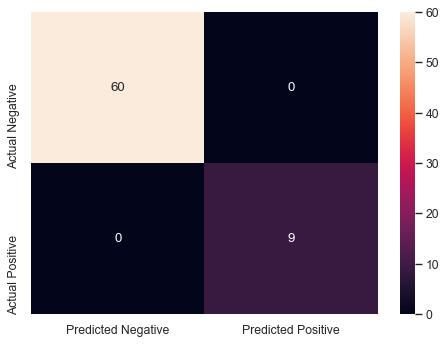

In [27]:
# Prediction on Train Data

y_pred_train = result.predict(x_train)

# Confusion Matrix

cm = pd.DataFrame(confusion_matrix(y_train, y_pred_train), 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive'])

print("Train Data Confusion Matrix:")

figure(figsize=(7,5), dpi=80)

sns.heatmap(cm, annot=True)

In [28]:
# Train Data Performance Measures

d = {'Accuracy': [accuracy_score(y_train, y_pred_train)] , 'Error' : [1-(accuracy_score(y_train, y_pred_train))], 'F1 Score': [f1_score(y_train, y_pred_train)]}
df_measures = pd.DataFrame(data=d,index=['Train Data Performance Measures'])
df_measures.T

,Train Data Performance Measures
Accuracy,1.0
Error,0.0
F1 Score,1.0


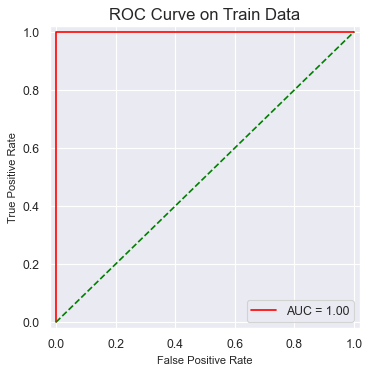

In [29]:
# ROC Curve for Train Data

from sklearn.metrics import roc_curve, auc

y_proba_train = result.predict_proba(x_train)
y_proba_train_pos = y_proba_train[:,1]
fpr, tpr, threshold = roc_curve(y_train, y_proba_train_pos)
roc_auc = auc(fpr, tpr)

figure(figsize=(5, 5), dpi=80)
plt.title('ROC Curve on Train Data', fontsize = 15)
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc, color='red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color='green')
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.ylabel('True Positive Rate',fontsize = 10)
plt.xlabel('False Positive Rate',fontsize = 10)
plt.show()

In [30]:
# AUC for Train Data

d = {'AUC': [roc_auc_score(y_train, y_proba_train_pos)]}
df_measures = pd.DataFrame(data=d,index = ['Train Data Performance Measures'])
df_measures.T

,Train Data Performance Measures
AUC,1.0


In [31]:
# p-value calculation using statsmodels

df_train = pd.concat([x_train,y_train],axis=1)

df_train_ = pd.DataFrame()
for x in most_optimal_features:
    df_train_ = pd.concat([df_train_,df_train[[x]]],axis=1)   

df_train_ = pd.concat([df_train_,df_train[['Activity']]],axis=1)
df_train_

cols = ['mean5', '_1stquart9', 'mean11', 'median11', '_1stquart11', 'mean17', 'median17', '_1stquart17', 'mean31', 'mean37', 'median37', 'mean45', 'median45', 'Activity']
df_train_final = pd.DataFrame(df_train_.values,columns=cols) 

formula = 'Activity ~ mean5 + _1stquart9 + mean11 + median11 + _1stquart11 + mean17 + median17 + _1stquart17 + mean31 + mean37 + median37 + mean45 + median45'
log_reg = smf.logit(formula=str(formula), data=df_train_final).fit(method='lbfgs')
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Activity   No. Observations:                   69
Model:                          Logit   Df Residuals:                       55
Method:                           MLE   Df Model:                           13
Date:                Tue, 22 Jun 2021   Pseudo R-squ.:                   1.000
Time:                        19:26:46   Log-Likelihood:            -4.9295e-05
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 7.589e-07
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0501   2.24e+04  -2.24e-06      1.000   -4.38e+04    4.38e+04
mean5           0.5857    840.859      0.001      0.999   -1647.467    1648.638
_1stquart9     -0.6652    839.474     -0.001      0.999   -1646.004    1644.673
mean11          0.8391   8436.457   9.95e-05      1.000   -1.65e+04    1.65e+04
median11        1.1493   4705.616      0.000      1.000   -9221.688    9223.987
_1stquart11     0.8841   2341.656      0.000      1.000   -4588.678    4590.446
mean17          0.6061   7125.488   8.51e-05      1.000    -1.4e+04     1.4e+04
median17        0.5483   2091.955      0.000      1.000   -4099.609    4100.705
_1stquart17     0.8389   5030.977      0.000      1.000   -9859.695    9861.373
mean31         -0.7739   1624.060     -0.000      1.000   -3183.873    3182.325
mean37         -0.6141   2231.105     -0.000      1.000   -4373.499    4372.271
median37       -0.6020   1737.860     -0.000      1.000   -3406.745    3405.541
mean45         -0.8184   1686.549     -0.000      1.000   -3306.394    3304.757
median45       -0.8895   1727.031     -0.001      1.000   -3385.807    3384.028
===============================================================================

Complete Separation: The results show that there iscomplete separation.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

Due to complete and perfect linear separation, the logistic regression estimates and standard errors become very unstable, and therefore meaningless. As we can see from above, all the p-values are almost close to or equal to 1 making all of these features insignificant for this model.

# (d) v. Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

Test Data Confusion Matrix:


<AxesSubplot:>

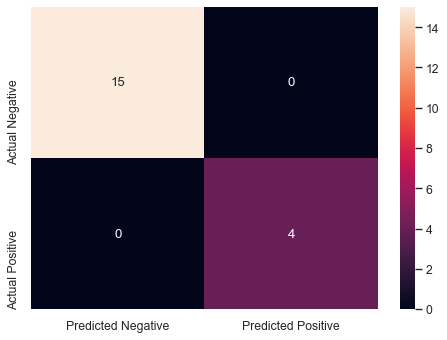

In [32]:
# Prediction on Test Data

y_pred_test = result.predict(x_test)

# Confusion Matrix

cm = pd.DataFrame(confusion_matrix(y_test, y_pred_test), 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive'])

print("Test Data Confusion Matrix:")

figure(figsize=(7,5), dpi=80)

sns.heatmap(cm, annot=True)

In [33]:
# Test Data Performance Measures

d = {'Accuracy': [accuracy_score(y_test, y_pred_test)] , 'Error' : [1-(accuracy_score(y_test, y_pred_test))], 'F1 Score': [f1_score(y_test, y_pred_test)]}
df_measures = pd.DataFrame(data=d,index=['Test Data Performance Measures'])
df_measures.T

,Test Data Performance Measures
Accuracy,1.0
Error,0.0
F1 Score,1.0


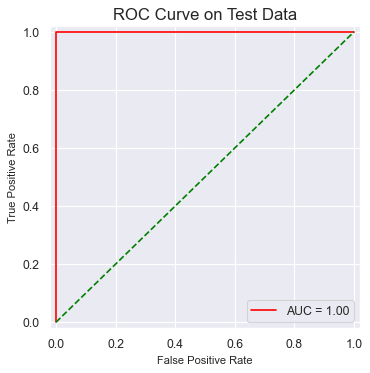

In [34]:
# ROC Curve for Test Data

from sklearn.metrics import roc_curve, auc

y_proba_test = result.predict_proba(x_test)
y_proba_test_pos = y_proba_test[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_proba_test_pos)
roc_auc = auc(fpr, tpr)

figure(figsize=(5, 5), dpi=80)
plt.title('ROC Curve on Test Data', fontsize = 15)
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc, color='red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color='green')
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.ylabel('True Positive Rate',fontsize = 10)
plt.xlabel('False Positive Rate',fontsize = 10)
plt.show()

In [35]:
# AUC for Test Data

d = {'AUC': [roc_auc_score(y_test, y_proba_test_pos)]}
df_measures = pd.DataFrame(data=d,index = ['Test Data Performance Measures'])
df_measures.T

,Test Data Performance Measures
AUC,1.0


The accuracy on the test set improves a little bit from the cross validation accuracy obtained previously from 0.9857 to 1.

# (d) vi. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

Yes, our classes are well-separated which is why there is instability in calculating the logistic regression parameters. We can use Linear Discriminant Analysis instead of Logistic Regression in this case.

# (d) vii. From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

Yes, from the confusion matrices that we obtained above, we see imbalanced classes.

In [36]:
# Case-Control Sampling (Undersampling)
# Recursive Feature Elimination Cross Validation (RFECV)

warnings.filterwarnings('ignore')

result_dict = {}

# Finding out the best l

for l in range(1,21):
    df_feature_extraction_final = time_series_division(l)

    df_feature_extraction_final_sel = pd.DataFrame()
    
    # Considering only the three most important time-domain features selected above

    for c in df_feature_extraction_final.columns:
        if (('mean' in c) or ('median' in c) or ('1st quart' in c)):
            df_feature_extraction_final_sel = pd.concat([df_feature_extraction_final_sel,df_feature_extraction_final[[c]]],axis=1)

    df_feature_extraction_final_sel = pd.concat([df_feature_extraction_final_sel,df_feature_extraction_final.iloc[:,(len(df_feature_extraction_final.columns)-2):(len(df_feature_extraction_final.columns))]],axis=1)
    
    x_train,y_train,x_test,y_test = train_test_split(df_feature_extraction_final_sel) 

    y_train['Activity'] = np.where(((y_train['Activity']=='bending1') | (y_train['Activity']=='bending2')),1,0)
    y_test['Activity'] = np.where(((y_test['Activity']=='bending1') | (y_test['Activity']=='bending2')),1,0)
    
    
    
    df_train = pd.concat([x_train,y_train],axis=1)

    df_1 = df_train[df_train['Activity']==1] 
    df_0 = df_train[df_train['Activity']==0] 
    
    # Undersampling the majority class

    resampled_df = resample(df_0, replace=False, n_samples=9, random_state=100)

    case_controlled_df = pd.concat([df_1, resampled_df],axis=0,ignore_index=True)
    
    x_train = case_controlled_df.iloc[:,:(len(case_controlled_df.columns)-1)]
    y_train = case_controlled_df.iloc[:,-1].to_frame()

    
  
    log_reg = LogisticRegression(C=10000, max_iter=10000, random_state=100)

    min_features_to_select = 1
    rfecv = RFECV(log_reg, step=1, cv=StratifiedKFold(n_splits=5), min_features_to_select=min_features_to_select)

    result = rfecv.fit(x_train,y_train)

    result_dict[l] = [result.n_features_, result.support_, result.ranking_, max(result.grid_scores_)]

In [37]:
print("Maximum grid score out of all of them is:")

no_of_optimal_features = []
max_grid_scores = []

for i in range(1,21):
    no_of_optimal_features.append(result_dict[i][0])
    max_grid_scores.append(result_dict[i][3])
    
print(np.max(max_grid_scores))

print('\n')
print("l at which we got maximum grid score is:")
l = np.argmax(max_grid_scores)+1
print(l)

print('\n')
print("p at which we got maximum grid score is:")
p = no_of_optimal_features[(np.argmax(max_grid_scores))]
print(p)

print('\n')
print("Best (l,p) pair is:",(l,p))

features_used = np.array(result_dict[l][1])
df_features_used = pd.DataFrame(features_used, columns =['feature_used_or_not'])
df_features_used['feature_used_or_not'] = np.where(df_features_used['feature_used_or_not']==True,1,0)

indexes_list = df_features_used[df_features_used['feature_used_or_not']==1].reset_index()['index']
features = ['mean', 'median', '1st quart']

print('\n')
print("The {0} most optimal features selected after dividing the time series into {1} parts are:".format(p,l))

most_optimal_features = [] 

for index in indexes_list:
    if (index%3==1):
        most_optimal_features.append(features[0]+str(math.ceil(index/len(features))))
    elif (index%3==2):
        most_optimal_features.append(features[1]+str(math.ceil(index/len(features))))
    elif (index%3==0):
        most_optimal_features.append(features[2]+str(math.ceil(index/len(features))))        
print(most_optimal_features)

Maximum grid score out of all of them is:
0.95


l at which we got maximum grid score is:
2


p at which we got maximum grid score is:
2


Best (l,p) pair is: (2, 2)


The 2 most optimal features selected after dividing the time series into 2 parts are:
['1st quart4', 'mean10']


In [38]:
# Fitting the model again with best l

warnings.filterwarnings('ignore')

result_dict = {}

df_feature_extraction_final = time_series_division(l)

df_feature_extraction_final_sel = pd.DataFrame()

for c in df_feature_extraction_final.columns:
    if (('mean' in c) or ('median' in c) or ('1st quart' in c)):
        df_feature_extraction_final_sel = pd.concat([df_feature_extraction_final_sel,df_feature_extraction_final[[c]]],axis=1)

df_feature_extraction_final_sel = pd.concat([df_feature_extraction_final_sel,df_feature_extraction_final.iloc[:,(len(df_feature_extraction_final.columns)-2):(len(df_feature_extraction_final.columns))]],axis=1)
    
x_train,y_train,x_test,y_test = train_test_split(df_feature_extraction_final_sel) 

y_train['Activity'] = np.where(((y_train['Activity']=='bending1') | (y_train['Activity']=='bending2')),1,0)
y_test['Activity'] = np.where(((y_test['Activity']=='bending1') | (y_test['Activity']=='bending2')),1,0)



df_train = pd.concat([x_train,y_train],axis=1)

df_1 = df_train[df_train['Activity']==1] 
df_0 = df_train[df_train['Activity']==0] 

resampled_df = resample(df_0, replace=False, n_samples=9, random_state=100)

case_controlled_df = pd.concat([df_1, resampled_df],axis=0,ignore_index=True)
    
x_train = case_controlled_df.iloc[:,:(len(case_controlled_df.columns)-1)]
y_train = case_controlled_df.iloc[:,-1].to_frame()

    

log_reg = LogisticRegression(C=10000, max_iter=10000, random_state=100)

result = log_reg.fit(x_train,y_train)

Train Data Confusion Matrix:


<AxesSubplot:>

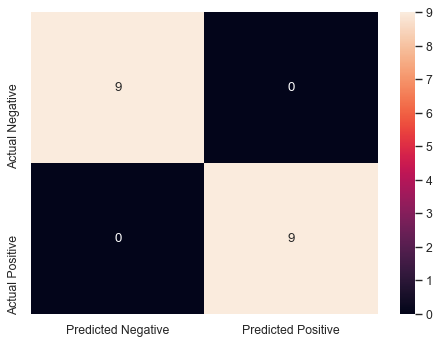

In [39]:
# Prediction on Train Data

y_pred_train = result.predict(x_train)

# Confusion Matrix

cm = pd.DataFrame(confusion_matrix(y_train, y_pred_train), 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive'])

print("Train Data Confusion Matrix:")

figure(figsize=(7,5), dpi=80)

sns.heatmap(cm, annot=True)

In [40]:
# Train Data Performance Measures

d = {'Accuracy': [accuracy_score(y_train, y_pred_train)] , 'Error' : [1-(accuracy_score(y_train, y_pred_train))], 'F1 Score': [f1_score(y_train, y_pred_train)]}
df_measures = pd.DataFrame(data=d,index=['Train Data Performance Measures'])
df_measures.T

,Train Data Performance Measures
Accuracy,1.0
Error,0.0
F1 Score,1.0


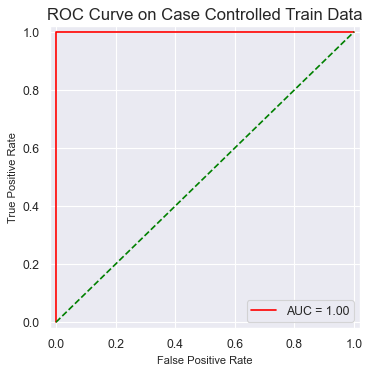

In [41]:
# ROC Curve for Train Data

from sklearn.metrics import roc_curve, auc

y_proba_train = result.predict_proba(x_train)
y_proba_train_pos = y_proba_train[:,1]
fpr, tpr, threshold = roc_curve(y_train, y_proba_train_pos)
roc_auc = auc(fpr, tpr)

figure(figsize=(5, 5), dpi=80)
plt.title('ROC Curve on Case Controlled Train Data', fontsize = 15)
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc, color='red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color='green')
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.ylabel('True Positive Rate',fontsize = 10)
plt.xlabel('False Positive Rate',fontsize = 10)
plt.show()

In [42]:
# AUC for Train Data

d = {'AUC': [roc_auc_score(y_train, y_proba_train_pos)]}
df_measures = pd.DataFrame(data=d,index = ['Train Data Performance Measures'])
df_measures.T

,Train Data Performance Measures
AUC,1.0


Test Data Confusion Matrix:


<AxesSubplot:>

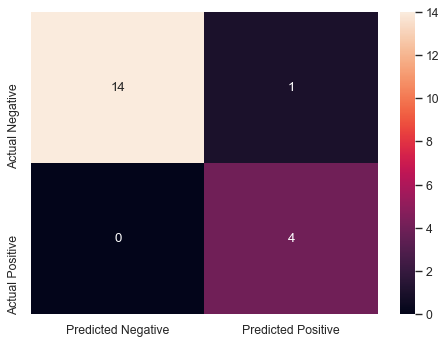

In [43]:
# Prediction on Test Data

y_pred_test = result.predict(x_test)

# Confusion Matrix

cm = pd.DataFrame(confusion_matrix(y_test, y_pred_test), 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive'])

print("Test Data Confusion Matrix:")

figure(figsize=(7,5), dpi=80)

sns.heatmap(cm, annot=True)

In [44]:
# Test Data Performance Measures

d = {'Accuracy': [accuracy_score(y_test, y_pred_test)] , 'Error' : [1-(accuracy_score(y_test, y_pred_test))], 'F1 Score': [f1_score(y_test, y_pred_test)]}
df_measures = pd.DataFrame(data=d,index=['Test Data Performance Measures'])
df_measures.T

,Test Data Performance Measures
Accuracy,0.947368
Error,0.052632
F1 Score,0.888889


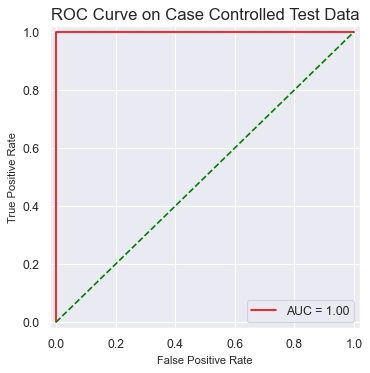

In [45]:
# ROC Curve for Test Data

from sklearn.metrics import roc_curve, auc

y_proba_test = result.predict_proba(x_test)
y_proba_test_pos = y_proba_test[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_proba_test_pos)
roc_auc = auc(fpr, tpr)

figure(figsize=(5, 5), dpi=80)
plt.title('ROC Curve on Case Controlled Test Data', fontsize = 15)
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc, color='red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color='green')
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.ylabel('True Positive Rate',fontsize = 10)
plt.xlabel('False Positive Rate',fontsize = 10)
plt.show()

In [46]:
# AUC for Test Data

d = {'AUC': [roc_auc_score(y_test, y_proba_test_pos)]}
df_measures = pd.DataFrame(data=d,index = ['Test Data Performance Measures'])
df_measures.T

,Test Data Performance Measures
AUC,1.0


# (e) Binary Classification Using L1-penalized logistic regression

# (e) i. Repeat 1(d)iii using L1-penalized logistic regression, i.e. instead of using pvalues for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and lambda, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for lambda automatically

In [47]:
# L1-penalized logistic regression

warnings.filterwarnings('ignore')

scaler = MinMaxScaler()

result_dict = {}

# Finding out the best l

for l in range(1,21):
    df_feature_extraction_final = time_series_division(l)

    df_feature_extraction_final_sel = pd.DataFrame()
    
    # Considering only the three most important time-domain features selected above

    for c in df_feature_extraction_final.columns:
        if (('mean' in c) or ('median' in c) or ('1st quart' in c)):
            df_feature_extraction_final_sel = pd.concat([df_feature_extraction_final_sel,df_feature_extraction_final[[c]]],axis=1)

    df_feature_extraction_final_sel = pd.concat([df_feature_extraction_final_sel,df_feature_extraction_final.iloc[:,(len(df_feature_extraction_final.columns)-2):(len(df_feature_extraction_final.columns))]],axis=1)
    
    x_train,y_train,x_test,y_test = train_test_split(df_feature_extraction_final_sel) 

    y_train['Activity'] = np.where(((y_train['Activity']=='bending1') | (y_train['Activity']=='bending2')),1,0)
    y_test['Activity'] = np.where(((y_test['Activity']=='bending1') | (y_test['Activity']=='bending2')),1,0)
    
    
    # Normalization using MinMaxScaler
    
    x_train_cols = x_train.columns
    x_train_normalized = scaler.fit_transform(x_train)
    x_train = pd.DataFrame(x_train_normalized, columns=x_train_cols)
    
    x_test_cols = x_test.columns
    x_test_normalized = scaler.fit_transform(x_test)
    x_test = pd.DataFrame(x_test_normalized, columns=x_test_cols)

         
    log_reg = LogisticRegressionCV(cv=StratifiedKFold(n_splits=5), penalty='l1', class_weight='balanced', solver='liblinear', random_state=100, max_iter=10000)
    
    result = log_reg.fit(x_train,y_train)
    
    C_index = np.where(result.Cs_ == result.C_)[0][0]  
    best_cv_score = np.mean(list(zip(*result.scores_[1]))[C_index])

    result_dict[l] = [result.C_[0],best_cv_score]

In [48]:
print("Maximum score out of all of them is:")

best_Cs = []
best_cv_scores =[]

for i in range(1,21):
    best_Cs.append(result_dict[i][0])
    best_cv_scores.append(result_dict[i][1])
    
print(np.max(best_cv_scores))
    
print('\n')
print("l at which we got maximum score is:")
l = np.argmax(best_cv_scores)+1
print(l)

print('\n')
print("C at which we got maximum score is:")
C = best_Cs[(np.argmax(best_cv_scores))]
print(C)

print('\n')
print("Best (l,C) pair is:",(l,C))

print('\n')
print("Best Cs are:",best_Cs)

Maximum score out of all of them is:
0.9714285714285715


l at which we got maximum score is:
11


C at which we got maximum score is:
2.782559402207126


Best (l,C) pair is: (11, 2.782559402207126)


Best Cs are: [2.782559402207126, 21.54434690031882, 166.81005372000558, 2.782559402207126, 2.782559402207126, 1291.5496650148827, 2.782559402207126, 21.54434690031882, 10000.0, 2.782559402207126, 2.782559402207126, 2.782559402207126, 10000.0, 166.81005372000558, 166.81005372000558, 2.782559402207126, 21.54434690031882, 2.782559402207126, 2.782559402207126, 2.782559402207126]


In [49]:
# Fitting the model again with best l

df_feature_extraction_final = time_series_division(l)

df_feature_extraction_final_sel = pd.DataFrame()

for c in df_feature_extraction_final.columns:
    if (('mean' in c) or ('median' in c) or ('1st quart' in c)):
        df_feature_extraction_final_sel = pd.concat([df_feature_extraction_final_sel,df_feature_extraction_final[[c]]],axis=1)

df_feature_extraction_final_sel = pd.concat([df_feature_extraction_final_sel,df_feature_extraction_final.iloc[:,(len(df_feature_extraction_final.columns)-2):(len(df_feature_extraction_final.columns))]],axis=1)
    
x_train,y_train,x_test,y_test = train_test_split(df_feature_extraction_final_sel) 

y_train['Activity'] = np.where(((y_train['Activity']=='bending1') | (y_train['Activity']=='bending2')),1,0)
y_test['Activity'] = np.where(((y_test['Activity']=='bending1') | (y_test['Activity']=='bending2')),1,0)
    
    
x_train_cols = x_train.columns
x_train_normalized = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_normalized, columns=x_train_cols)

x_test_cols = x_test.columns
x_test_normalized = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_normalized, columns=x_test_cols)

         
log_reg = LogisticRegression(C=C, penalty='l1', class_weight='balanced', solver='liblinear', random_state=100, max_iter=10000)
result = log_reg.fit(x_train,y_train)

Train Data Confusion Matrix:


<AxesSubplot:>

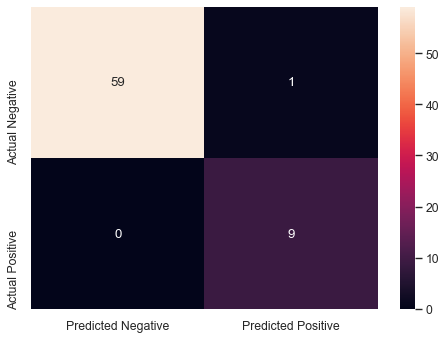

In [50]:
# Prediction on Train Data

y_pred_train = result.predict(x_train)

# Confusion Matrix

cm = pd.DataFrame(confusion_matrix(y_train, y_pred_train), 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive'])

print("Train Data Confusion Matrix:")

figure(figsize=(7,5), dpi=80)

sns.heatmap(cm, annot=True)

In [51]:
# Train Data Performance Measures

d = {'Accuracy': [accuracy_score(y_train, y_pred_train)] , 'Error' : [1-(accuracy_score(y_train, y_pred_train))], 'F1 Score': [f1_score(y_train, y_pred_train)]}
df_measures = pd.DataFrame(data=d,index=['Train Data Performance Measures'])
df_measures.T

,Train Data Performance Measures
Accuracy,0.985507
Error,0.014493
F1 Score,0.947368


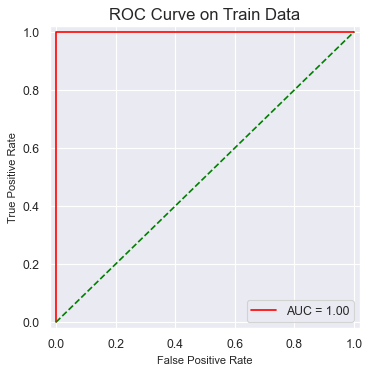

In [52]:
# ROC Curve for Train Data

from sklearn.metrics import roc_curve, auc

y_proba_train = result.predict_proba(x_train)
y_proba_train_pos = y_proba_train[:,1]
fpr, tpr, threshold = roc_curve(y_train, y_proba_train_pos)
roc_auc = auc(fpr, tpr)

figure(figsize=(5, 5), dpi=80)
plt.title('ROC Curve on Train Data', fontsize = 15)
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc, color='red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color='green')
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.ylabel('True Positive Rate',fontsize = 10)
plt.xlabel('False Positive Rate',fontsize = 10)
plt.show()

In [53]:
# AUC for Train Data

d = {'AUC': [roc_auc_score(y_train, y_proba_train_pos)]}
df_measures = pd.DataFrame(data=d,index = ['Train Data Performance Measures'])
df_measures.T

,Train Data Performance Measures
AUC,1.0


Test Data Confusion Matrix:


<AxesSubplot:>

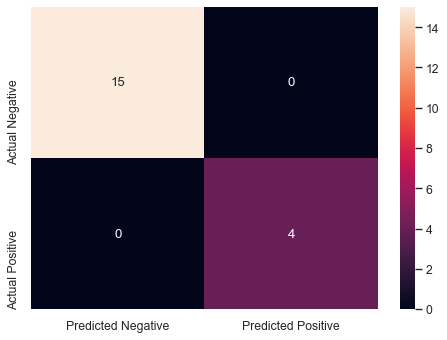

In [54]:
# Prediction on Test Data

y_pred_test = result.predict(x_test)

# Confusion Matrix

cm = pd.DataFrame(confusion_matrix(y_test, y_pred_test), 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive'])

print("Test Data Confusion Matrix:")

figure(figsize=(7,5), dpi=80)

sns.heatmap(cm, annot=True)

In [55]:
# Test Data Performance Measures

d = {'Accuracy': [accuracy_score(y_test, y_pred_test)] , 'Error' : [1-(accuracy_score(y_test, y_pred_test))], 'F1 Score': [f1_score(y_test, y_pred_test)]}
df_measures = pd.DataFrame(data=d,index=['Test Data Performance Measures'])
df_measures.T

,Test Data Performance Measures
Accuracy,1.0
Error,0.0
F1 Score,1.0


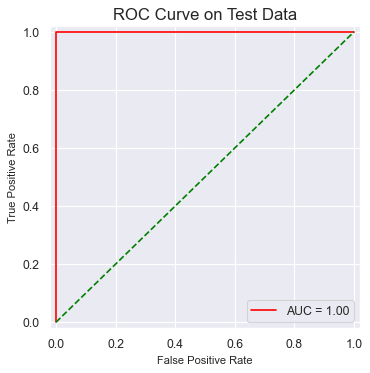

In [56]:
# ROC Curve for Test Data

from sklearn.metrics import roc_curve, auc

y_proba_test = result.predict_proba(x_test)
y_proba_test_pos = y_proba_test[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_proba_test_pos)
roc_auc = auc(fpr, tpr)

figure(figsize=(5, 5), dpi=80)
plt.title('ROC Curve on Test Data', fontsize = 15)
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc, color='red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color='green')
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.ylabel('True Positive Rate',fontsize = 10)
plt.xlabel('False Positive Rate',fontsize = 10)
plt.show()

In [57]:
# AUC for Test Data

d = {'AUC': [roc_auc_score(y_test, y_proba_test_pos)]}
df_measures = pd.DataFrame(data=d,index = ['Test Data Performance Measures'])
df_measures.T

,Test Data Performance Measures
AUC,1.0


# (e) ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement? 

Both the classifiers when run on the test sets give perfect accuracies and f1-scores of 1.As for implementation, the L1-penalized logsitic regression model is much easier to implement.In contrast, the model implementing variable selection using p-values(backward selection) with lots of features turns out to be very time consuming. 

# (f) Multi-class Classification (The Realistic Case)

# (f) i. Find the best l in the same way as you found it in 1(e)i to build an L1- penalized multinomial regression model to classify all activities in your training set. Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.

In [58]:
# L1-penalized multinomial regression

warnings.filterwarnings('ignore')

scaler = MinMaxScaler()

result_dict = {}

# Finding out the best l

for l in range(1,21):
    df_feature_extraction_final = time_series_division(l)

    df_feature_extraction_final_sel = pd.DataFrame()
    
    # Considering only the three most important time-domain features selected above

    for c in df_feature_extraction_final.columns:
        if (('mean' in c) or ('median' in c) or ('1st quart' in c)):
            df_feature_extraction_final_sel = pd.concat([df_feature_extraction_final_sel,df_feature_extraction_final[[c]]],axis=1)

    df_feature_extraction_final_sel = pd.concat([df_feature_extraction_final_sel,df_feature_extraction_final.iloc[:,(len(df_feature_extraction_final.columns)-2):(len(df_feature_extraction_final.columns))]],axis=1)
    
    x_train,y_train,x_test,y_test = train_test_split(df_feature_extraction_final_sel)     

    
    # Normalization using MinMaxScaler
    
    x_train_cols = x_train.columns
    x_train_normalized = scaler.fit_transform(x_train)
    x_train = pd.DataFrame(x_train_normalized, columns=x_train_cols)
    
    x_test_cols = x_test.columns
    x_test_normalized = scaler.fit_transform(x_test)
    x_test = pd.DataFrame(x_test_normalized, columns=x_test_cols)

    
    y_train['Activity'] = np.where(((y_train['Activity']=='bending1') | (y_train['Activity']=='bending2')),'bending',y_train['Activity'])
    y_test['Activity'] = np.where(((y_test['Activity']=='bending1') | (y_test['Activity']=='bending2')),'bending',y_test['Activity'])
  

    log_reg = LogisticRegressionCV(cv=StratifiedKFold(n_splits=5), multi_class='multinomial', penalty='l1', solver='saga', random_state=100, max_iter=10000)
    
    result = log_reg.fit(x_train,y_train)
    
    C_index = np.where(result.Cs_ == result.C_[0])[0][0]    
    best_cv_score = np.mean(list(zip(*result.scores_['bending']))[C_index])

    result_dict[l] = [result.C_[0],best_cv_score]

In [59]:
print("Maximum score out of all of them is:")

best_Cs = []
best_cv_scores =[]

for i in range(1,21):
    best_Cs.append(result_dict[i][0])
    best_cv_scores.append(result_dict[i][1])
    
print(np.max(best_cv_scores))

print('\n')
print("l at which we got maximum score is:")
l = np.argmax(best_cv_scores)+1
print(l)

print('\n')
print("Best l is:",l)

print('\n')
print("C at which we got maximum score is:")
C = best_Cs[(np.argmax(best_cv_scores))]
print(C)

Maximum score out of all of them is:
0.8263736263736263


l at which we got maximum score is:
1


Best l is: 1


C at which we got maximum score is:
166.81005372000558


In [60]:
# Fitting the model again with best l

df_feature_extraction_final = time_series_division(1)

df_feature_extraction_final_sel = pd.DataFrame()

for c in df_feature_extraction_final.columns:
    if (('mean' in c) or ('median' in c) or ('1st quart' in c)):
        df_feature_extraction_final_sel = pd.concat([df_feature_extraction_final_sel,df_feature_extraction_final[[c]]],axis=1)

df_feature_extraction_final_sel = pd.concat([df_feature_extraction_final_sel,df_feature_extraction_final.iloc[:,(len(df_feature_extraction_final.columns)-2):(len(df_feature_extraction_final.columns))]],axis=1)
    
x_train,y_train,x_test,y_test = train_test_split(df_feature_extraction_final_sel) 

    
x_train_cols = x_train.columns
x_train_normalized = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_normalized, columns=x_train_cols)

x_test_cols = x_test.columns
x_test_normalized = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_normalized, columns=x_test_cols)


y_train['Activity'] = np.where(((y_train['Activity']=='bending1') | (y_train['Activity']=='bending2')),'bending',y_train['Activity'])
y_test['Activity'] = np.where(((y_test['Activity']=='bending1') | (y_test['Activity']=='bending2')),'bending',y_test['Activity'])


log_reg = LogisticRegression(C=C, multi_class='multinomial', penalty='l1', solver='saga', random_state=100, max_iter=10000)

result = log_reg.fit(x_train,y_train)

Train Data Multi-label Confusion Matrix:
[[[60  0]
  [ 0  9]]

 [[57  0]
  [ 0 12]]

 [[57  0]
  [ 0 12]]

 [[57  0]
  [ 0 12]]

 [[57  0]
  [ 0 12]]

 [[57  0]
  [ 0 12]]]


Train Data Confusion Matrix:


<AxesSubplot:>

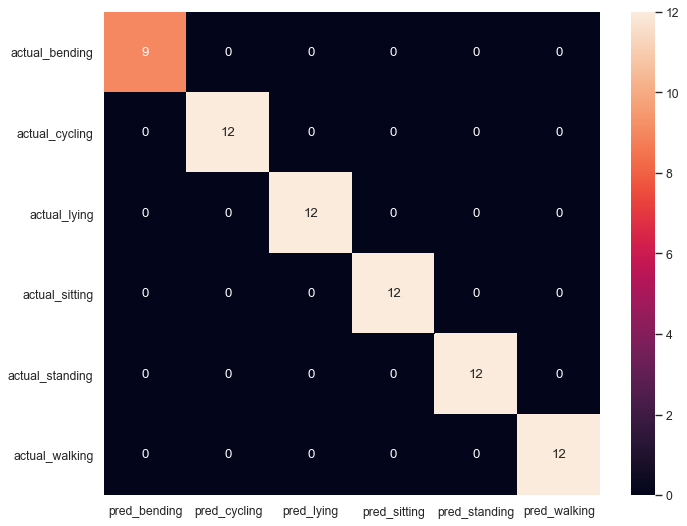

In [61]:
# Prediction on Train Data

y_pred_train = result.predict(x_train)

# Multi-label Confusion Matrix

cm_multilabel = multilabel_confusion_matrix(y_train, y_pred_train)

print("Train Data Multi-label Confusion Matrix:")
print(cm_multilabel)

# Confusion Matrix

cm = pd.DataFrame(confusion_matrix(y_train, y_pred_train), 
             columns=['pred_bending','pred_cycling','pred_lying','pred_sitting','pred_standing','pred_walking'], 
             index=['actual_bending','actual_cycling','actual_lying','actual_sitting','actual_standing','actual_walking'])

print('\n')
print("Train Data Confusion Matrix:")

figure(figsize=(10,8), dpi=80)

sns.heatmap(cm, annot=True)

In [62]:
# Train Data Performance Measures

d = {'Accuracy': [accuracy_score(y_train, y_pred_train)] , 'Error' : [1-(accuracy_score(y_train, y_pred_train))], 'F1 Score': [f1_score(y_train, y_pred_train,average='weighted')]}
df_measures = pd.DataFrame(data=d,index=['Train Data Performance Measures'])
df_measures.T

,Train Data Performance Measures
Accuracy,1.0
Error,0.0
F1 Score,1.0


Test Data Multi-label Confusion Matrix:
[[[15  0]
  [ 0  4]]

 [[16  0]
  [ 0  3]]

 [[16  0]
  [ 0  3]]

 [[16  0]
  [ 0  3]]

 [[16  0]
  [ 0  3]]

 [[16  0]
  [ 0  3]]]


Test Data Confusion Matrix:


<AxesSubplot:>

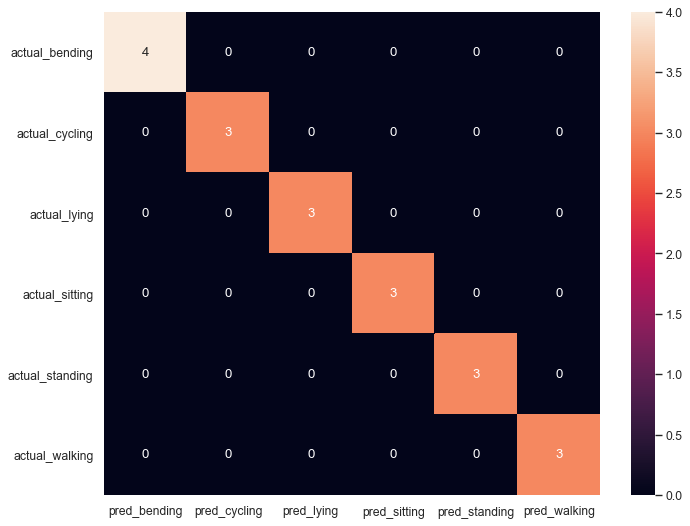

In [63]:
# Prediction on Test Data

y_pred_test = result.predict(x_test)

# Multi-label Confusion Matrix

cm_multilabel = multilabel_confusion_matrix(y_test, y_pred_test)

print("Test Data Multi-label Confusion Matrix:")
print(cm_multilabel)

# Confusion Matrix

cm = pd.DataFrame(confusion_matrix(y_test, y_pred_test), 
             columns=['pred_bending','pred_cycling','pred_lying','pred_sitting','pred_standing','pred_walking'], 
             index=['actual_bending','actual_cycling','actual_lying','actual_sitting','actual_standing','actual_walking'])

print('\n')
print("Test Data Confusion Matrix:")

figure(figsize=(10,8), dpi=80)

sns.heatmap(cm, annot=True)

In [64]:
# Test Data Performance Measures

d = {'Accuracy': [accuracy_score(y_test, y_pred_test)] , 'Error' : [1-(accuracy_score(y_test, y_pred_test))], 'F1 Score': [f1_score(y_test, y_pred_test,average='weighted')]}
df_measures = pd.DataFrame(data=d,index=['Test Data Performance Measures'])
df_measures.T

,Test Data Performance Measures
Accuracy,1.0
Error,0.0
F1 Score,1.0


In [65]:
y_train_1 = y_train.copy(deep=True)
y_test_1 = y_test.copy(deep=True)

# Assign a number to each class

y_train_1['Activity'] = np.where(((y_train_1['Activity']=='bending1') | (y_train_1['Activity']=='bending2')),'bending',y_train_1['Activity'])

y_train_1['Activity'] = np.where((y_train_1['Activity']=='bending'),0,y_train_1['Activity'])
y_train_1['Activity'] = np.where((y_train_1['Activity']=='cycling'),1,y_train_1['Activity'])
y_train_1['Activity'] = np.where((y_train_1['Activity']=='lying'),2,y_train_1['Activity'])
y_train_1['Activity'] = np.where((y_train_1['Activity']=='sitting'),3,y_train_1['Activity'])
y_train_1['Activity'] = np.where((y_train_1['Activity']=='standing'),4,y_train_1['Activity'])
y_train_1['Activity'] = np.where((y_train_1['Activity']=='walking'),5,y_train_1['Activity'])

y_test_1['Activity'] = np.where(((y_test_1['Activity']=='bending1') | (y_test_1['Activity']=='bending2')),'bending',y_test_1['Activity'])

y_test_1['Activity'] = np.where((y_test_1['Activity']=='bending'),0,y_test_1['Activity'])
y_test_1['Activity'] = np.where((y_test_1['Activity']=='cycling'),1,y_test_1['Activity'])
y_test_1['Activity'] = np.where((y_test_1['Activity']=='lying'),2,y_test_1['Activity'])
y_test_1['Activity'] = np.where((y_test_1['Activity']=='sitting'),3,y_test_1['Activity'])
y_test_1['Activity'] = np.where((y_test_1['Activity']=='standing'),4,y_test_1['Activity'])
y_test_1['Activity'] = np.where((y_test_1['Activity']=='walking'),5,y_test_1['Activity'])

y_train_1 = y_train_1.astype(int)
y_test_1 = y_test_1.astype(int)

y_train_1 = y_train_1.to_numpy().flatten()
y_test_1 = y_test_1.to_numpy().flatten()

# Binarize all the classes

y_train_bin = label_binarize(y_train_1, classes=[0,1,2,3,4,5])
y_test_bin = label_binarize(y_test_1, classes=[0,1,2,3,4,5])
n_classes = 6

x_train_1 = x_train.values
x_test_1 = x_test.values

# OneVsRestClassifier

clf = OneVsRestClassifier(LogisticRegression(C=C, multi_class='multinomial', penalty='l1', solver='saga', random_state=100, max_iter=10000)
)

y_train_score = clf.fit(x_train_1, y_train_bin).decision_function(x_train_1)
y_test_score = clf.fit(x_train_1, y_train_bin).decision_function(x_test_1)

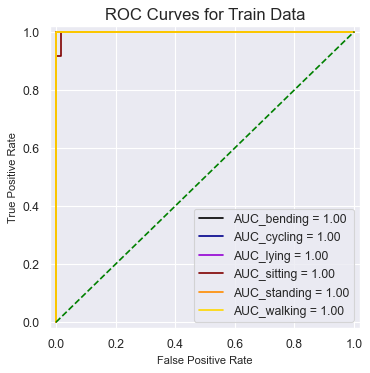

In [66]:
# ROC Curves for Train Data for each of the classes

from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

activities = {0:'bending',1:'cycling',2:'lying',3:'sitting',4:'standing',5:'walking'}
colours = ['black','darkblue','darkviolet','maroon','darkorange','gold']

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_bin[:, i], y_train_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

figure(figsize=(5, 5), dpi=80)
plt.title('ROC Curves for Train Data', fontsize = 15)
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label = 'AUC_{} = %0.2f'.format(activities[i]) % roc_auc[i], color=colours[i])
    
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color='green')
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.ylabel('True Positive Rate',fontsize = 10)
plt.xlabel('False Positive Rate',fontsize = 10)
plt.show()

In [67]:
# AUC for Train Data

auc_scores = []

for i in range(n_classes):
    auc_scores.append(roc_auc[i])

# AUC will be the mean of the AUCs of all classes

auc = np.mean(auc_scores)

d = {'AUC': [auc]}
df_measures = pd.DataFrame(data=d,index = ['Train Data Performance Measures'])
df_measures.T

,Train Data Performance Measures
AUC,0.999756


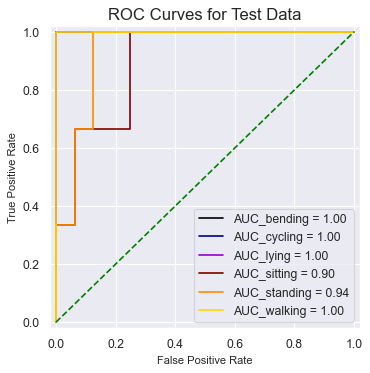

In [68]:
# ROC Curves for Test Data for each of the classes

from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

activities = {0:'bending',1:'cycling',2:'lying',3:'sitting',4:'standing',5:'walking'}
colours = ['black','darkblue','darkviolet','maroon','darkorange','gold']

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

figure(figsize=(5, 5), dpi=80)
plt.title('ROC Curves for Test Data', fontsize = 15)
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label = 'AUC_{} = %0.2f'.format(activities[i]) % roc_auc[i], color=colours[i])
    
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color='green')
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.ylabel('True Positive Rate',fontsize = 10)
plt.xlabel('False Positive Rate',fontsize = 10)
plt.show()

In [69]:
# AUC for Test Data

auc_scores = []

for i in range(n_classes):
    auc_scores.append(roc_auc[i])
    
# AUC will be the mean of the AUCs of all classes

auc = np.mean(auc_scores)

d = {'AUC': [auc]}
df_measures = pd.DataFrame(data=d,index = ['Test Data Performance Measures'])
df_measures.T

,Test Data Performance Measures
AUC,0.972222


The test error is 0.

# (f) ii. Repeat 1(f)i using a Naive Bayes' classifier. Use both Gaussian and Multinomial priors and compare the results.

In [70]:
# Gaussian NB

warnings.filterwarnings('ignore')

result_dict = {}

# Finding out the best l

for l in range(1,21):
    df_feature_extraction_final = time_series_division(l)

    df_feature_extraction_final_sel = pd.DataFrame()
    
    # Considering only the three most important time-domain features selected above

    for c in df_feature_extraction_final.columns:
        if (('mean' in c) or ('median' in c) or ('1st quart' in c)):
            df_feature_extraction_final_sel = pd.concat([df_feature_extraction_final_sel,df_feature_extraction_final[[c]]],axis=1)

    df_feature_extraction_final_sel = pd.concat([df_feature_extraction_final_sel,df_feature_extraction_final.iloc[:,(len(df_feature_extraction_final.columns)-2):(len(df_feature_extraction_final.columns))]],axis=1)
    
    x_train,y_train,x_test,y_test = train_test_split(df_feature_extraction_final_sel) 

    
    gnb = GaussianNB() 
    
    params = {}
    gnb_cv = GridSearchCV(estimator=gnb, param_grid=params, cv=StratifiedKFold(n_splits=5))
    
    result = gnb_cv.fit(x_train,y_train)
    
    result_dict[l] = [result.best_score_]

In [71]:
print("Maximum score out of all of them is:")

scores = []

for i in range(1,21):
    scores.append(result_dict[i][0])
    
print(np.max(scores))

print('\n')
print("l at which we got maximum score is:")
l = np.argmax(scores)+1
print(l)

print('\n')
print("Best l is:",l)

Maximum score out of all of them is:
0.7824175824175824


l at which we got maximum score is:
2


Best l is: 2


In [72]:
# Fitting the model again with best l

warnings.filterwarnings('ignore')

df_feature_extraction_final = time_series_division(l)

df_feature_extraction_final_sel = pd.DataFrame()

for c in df_feature_extraction_final.columns:
    if (('mean' in c) or ('median' in c) or ('1st quart' in c)):
        df_feature_extraction_final_sel = pd.concat([df_feature_extraction_final_sel,df_feature_extraction_final[[c]]],axis=1)

df_feature_extraction_final_sel = pd.concat([df_feature_extraction_final_sel,df_feature_extraction_final.iloc[:,(len(df_feature_extraction_final.columns)-2):(len(df_feature_extraction_final.columns))]],axis=1)
    
x_train,y_train,x_test,y_test = train_test_split(df_feature_extraction_final_sel) 

y_train['Activity'] = np.where(((y_train['Activity']=='bending1') | (y_train['Activity']=='bending2')),'bending',y_train['Activity'])
y_test['Activity'] = np.where(((y_test['Activity']=='bending1') | (y_test['Activity']=='bending2')),'bending',y_test['Activity'])
    
gnb = GaussianNB() 

result = gnb.fit(x_train,y_train)

Train Data Multi-label Confusion Matrix:
[[[60  0]
  [ 0  9]]

 [[57  0]
  [ 0 12]]

 [[57  0]
  [ 0 12]]

 [[56  1]
  [ 2 10]]

 [[55  2]
  [ 1 11]]

 [[57  0]
  [ 0 12]]]


Train Data Confusion Matrix:


<AxesSubplot:>

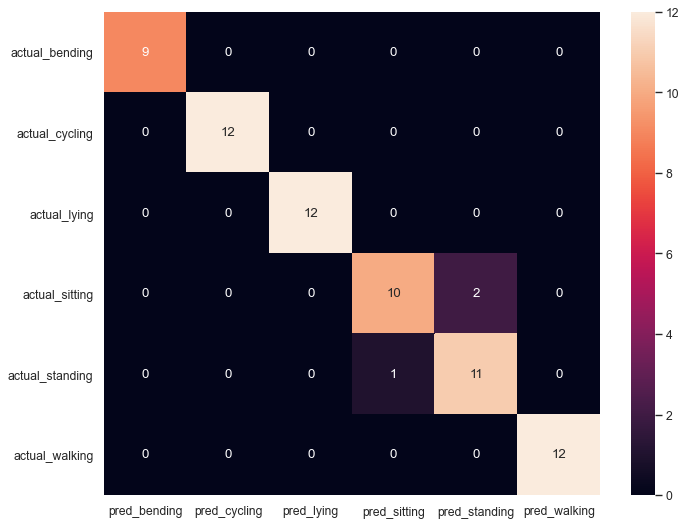

In [73]:
# Prediction on Train Data

y_pred_train = result.predict(x_train)

# Multi-label Confusion Matrix

cm_multilabel = multilabel_confusion_matrix(y_train, y_pred_train)

print("Train Data Multi-label Confusion Matrix:")
print(cm_multilabel)

# Confusion Matrix

cm = pd.DataFrame(confusion_matrix(y_train, y_pred_train), 
             columns=['pred_bending','pred_cycling','pred_lying','pred_sitting','pred_standing','pred_walking'], 
             index=['actual_bending','actual_cycling','actual_lying','actual_sitting','actual_standing','actual_walking'])

print('\n')
print("Train Data Confusion Matrix:")

figure(figsize=(10,8), dpi=80)

sns.heatmap(cm, annot=True)

In [74]:
# Train Data Performance Measures

d = {'Accuracy': [accuracy_score(y_train, y_pred_train)] , 'Error' : [1-(accuracy_score(y_train, y_pred_train))], 'F1 Score': [f1_score(y_train, y_pred_train,average='weighted')]}
df_measures = pd.DataFrame(data=d,index=['Train Data Performance Measures'])
df_measures.T

,Train Data Performance Measures
Accuracy,0.956522
Error,0.043478
F1 Score,0.956446


Test Data Multi-label Confusion Matrix:
[[[14  1]
  [ 0  4]]

 [[16  0]
  [ 0  3]]

 [[16  0]
  [ 0  3]]

 [[15  1]
  [ 2  1]]

 [[15  1]
  [ 1  2]]

 [[16  0]
  [ 0  3]]]


Test Data Confusion Matrix:


<AxesSubplot:>

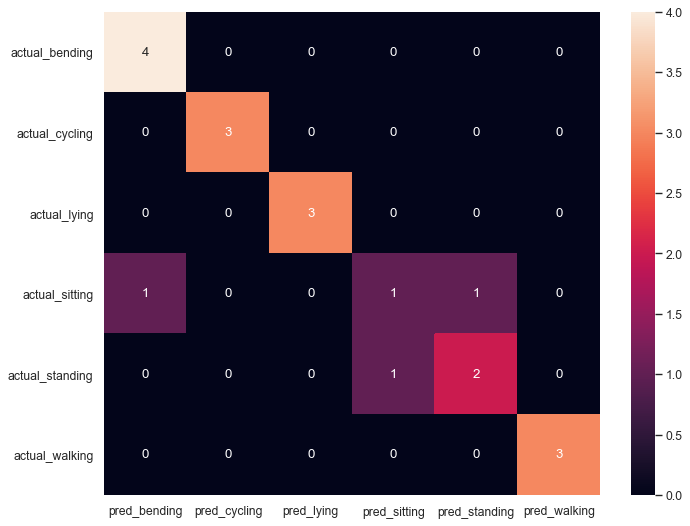

In [75]:
# Prediction on Test Data

y_pred_test = result.predict(x_test)

# Multi-label Confusion Matrix

cm_multilabel = multilabel_confusion_matrix(y_test, y_pred_test)

print("Test Data Multi-label Confusion Matrix:")
print(cm_multilabel)

# Confusion Matrix

cm = pd.DataFrame(confusion_matrix(y_test, y_pred_test), 
             columns=['pred_bending','pred_cycling','pred_lying','pred_sitting','pred_standing','pred_walking'], 
             index=['actual_bending','actual_cycling','actual_lying','actual_sitting','actual_standing','actual_walking'])

print('\n')
print("Test Data Confusion Matrix:")

figure(figsize=(10,8), dpi=80)

sns.heatmap(cm, annot=True)

In [76]:
# Test Data Performance Measures

d = {'Accuracy': [accuracy_score(y_test, y_pred_test)] , 'Error' : [1-(accuracy_score(y_test, y_pred_test))], 'F1 Score': [f1_score(y_test, y_pred_test,average='weighted')]}
df_measures = pd.DataFrame(data=d,index=['Test Data Performance Measures'])
df_measures.T

,Test Data Performance Measures
Accuracy,0.842105
Error,0.157895
F1 Score,0.829240


In [77]:
y_train_1 = y_train.copy(deep=True)
y_test_1 = y_test.copy(deep=True)

# Assign a number to each class

y_train_1['Activity'] = np.where(((y_train_1['Activity']=='bending1') | (y_train_1['Activity']=='bending2')),'bending',y_train_1['Activity'])

y_train_1['Activity'] = np.where((y_train_1['Activity']=='bending'),0,y_train_1['Activity'])
y_train_1['Activity'] = np.where((y_train_1['Activity']=='cycling'),1,y_train_1['Activity'])
y_train_1['Activity'] = np.where((y_train_1['Activity']=='lying'),2,y_train_1['Activity'])
y_train_1['Activity'] = np.where((y_train_1['Activity']=='sitting'),3,y_train_1['Activity'])
y_train_1['Activity'] = np.where((y_train_1['Activity']=='standing'),4,y_train_1['Activity'])
y_train_1['Activity'] = np.where((y_train_1['Activity']=='walking'),5,y_train_1['Activity'])

y_test_1['Activity'] = np.where(((y_test_1['Activity']=='bending1') | (y_test_1['Activity']=='bending2')),'bending',y_test_1['Activity'])

y_test_1['Activity'] = np.where((y_test_1['Activity']=='bending'),0,y_test_1['Activity'])
y_test_1['Activity'] = np.where((y_test_1['Activity']=='cycling'),1,y_test_1['Activity'])
y_test_1['Activity'] = np.where((y_test_1['Activity']=='lying'),2,y_test_1['Activity'])
y_test_1['Activity'] = np.where((y_test_1['Activity']=='sitting'),3,y_test_1['Activity'])
y_test_1['Activity'] = np.where((y_test_1['Activity']=='standing'),4,y_test_1['Activity'])
y_test_1['Activity'] = np.where((y_test_1['Activity']=='walking'),5,y_test_1['Activity'])

y_train_1 = y_train_1.astype(int)
y_test_1 = y_test_1.astype(int)

y_train_1 = y_train_1.to_numpy().flatten()
y_test_1 = y_test_1.to_numpy().flatten()

# Binarize all the classes

y_train_bin = label_binarize(y_train_1, classes=[0,1,2,3,4,5])
y_test_bin = label_binarize(y_test_1, classes=[0,1,2,3,4,5])
n_classes = 6

x_train_1 = x_train.values
x_test_1 = x_test.values

# OneVsRestClassifier

clf = OneVsRestClassifier(gnb)

y_train_score = clf.fit(x_train_1, y_train_bin).predict(x_train_1)
y_test_score = clf.fit(x_train_1, y_train_bin).predict(x_test_1)

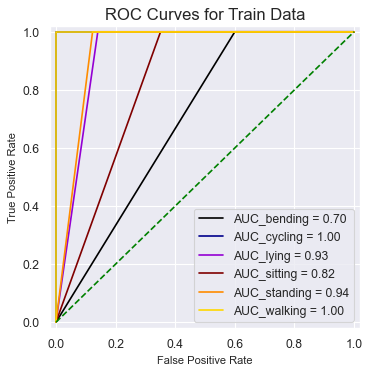

In [78]:
# ROC Curves for Train Data for each of the classes

from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

activities = {0:'bending',1:'cycling',2:'lying',3:'sitting',4:'standing',5:'walking'}
colours = ['black','darkblue','darkviolet','maroon','darkorange','gold']

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_bin[:, i], y_train_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

figure(figsize=(5, 5), dpi=80)
plt.title('ROC Curves for Train Data', fontsize = 15)
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label = 'AUC_{} = %0.2f'.format(activities[i]) % roc_auc[i], color=colours[i])
    
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color='green')
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.ylabel('True Positive Rate',fontsize = 10)
plt.xlabel('False Positive Rate',fontsize = 10)
plt.show()

In [79]:
# AUC for Train Data

auc_scores = []

for i in range(n_classes):
    auc_scores.append(roc_auc[i])

auc = np.mean(auc_scores)

d = {'AUC': [auc]}
df_measures = pd.DataFrame(data=d,index = ['Train Data Performance Measures'])
df_measures.T

,Train Data Performance Measures
AUC,0.89883


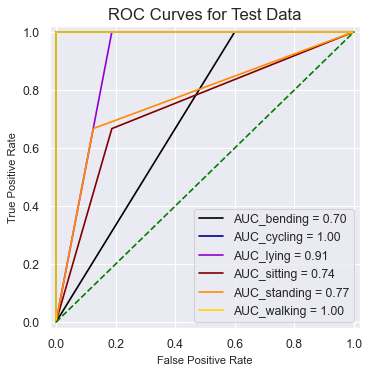

In [80]:
# Compute ROC curve and ROC area for each class

from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

activities = {0:'bending',1:'cycling',2:'lying',3:'sitting',4:'standing',5:'walking'}
colours = ['black','darkblue','darkviolet','maroon','darkorange','gold']

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

figure(figsize=(5, 5), dpi=80)
plt.title('ROC Curves for Test Data', fontsize = 15)
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label = 'AUC_{} = %0.2f'.format(activities[i]) % roc_auc[i], color=colours[i])
    
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color='green')
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.ylabel('True Positive Rate',fontsize = 10)
plt.xlabel('False Positive Rate',fontsize = 10)
plt.show()

In [81]:
# Get the AUC score

auc_scores = []

for i in range(n_classes):
    auc_scores.append(roc_auc[i])
    
# AUC will be the mean of the AUCs of all classes

auc = np.mean(auc_scores)

d = {'AUC': [auc]}
df_measures = pd.DataFrame(data=d,index = ['Test Data Performance Measures'])
df_measures.T

,Test Data Performance Measures
AUC,0.852778


In [82]:
# Multinomial NB

warnings.filterwarnings('ignore')

result_dict = {}

# Finding out the best l

for l in range(1,21):
    df_feature_extraction_final = time_series_division(l)

    df_feature_extraction_final_sel = pd.DataFrame()
    
    # Considering only the three most important time-domain features selected above

    for c in df_feature_extraction_final.columns:
        if (('mean' in c) or ('median' in c) or ('1st quart' in c)):
            df_feature_extraction_final_sel = pd.concat([df_feature_extraction_final_sel,df_feature_extraction_final[[c]]],axis=1)

    df_feature_extraction_final_sel = pd.concat([df_feature_extraction_final_sel,df_feature_extraction_final.iloc[:,(len(df_feature_extraction_final.columns)-2):(len(df_feature_extraction_final.columns))]],axis=1)
    
    x_train,y_train,x_test,y_test = train_test_split(df_feature_extraction_final_sel) 
    
    
    mnb = MultinomialNB() 
    
    params = {}
    mnb_cv = GridSearchCV(estimator=mnb, param_grid=params, cv=StratifiedKFold(n_splits=5))
    
    result = mnb_cv.fit(x_train,y_train)
    
    result_dict[l] = [result.best_score_]

In [83]:
print("Maximum score out of all of them is:")

scores = []

for i in range(1,21):
    scores.append(result_dict[i][0])
    
print(np.max(scores))

print('\n')
print("l at which we got maximum score is:")
l = np.argmax(scores)+1
print(l)

print('\n')
print("Best l is:",l)

Maximum score out of all of them is:
0.7681318681318681


l at which we got maximum score is:
6


Best l is: 6


In [84]:
# Fitting the model again with best l

warnings.filterwarnings('ignore')

df_feature_extraction_final = time_series_division(l)

df_feature_extraction_final_sel = pd.DataFrame()

for c in df_feature_extraction_final.columns:
    if (('mean' in c) or ('median' in c) or ('1st quart' in c)):
        df_feature_extraction_final_sel = pd.concat([df_feature_extraction_final_sel,df_feature_extraction_final[[c]]],axis=1)

df_feature_extraction_final_sel = pd.concat([df_feature_extraction_final_sel,df_feature_extraction_final.iloc[:,(len(df_feature_extraction_final.columns)-2):(len(df_feature_extraction_final.columns))]],axis=1)
    
x_train,y_train,x_test,y_test = train_test_split(df_feature_extraction_final_sel) 

y_train['Activity'] = np.where(((y_train['Activity']=='bending1') | (y_train['Activity']=='bending2')),'bending',y_train['Activity'])
y_test['Activity'] = np.where(((y_test['Activity']=='bending1') | (y_test['Activity']=='bending2')),'bending',y_test['Activity'])


mnb = MultinomialNB() 
    
result = mnb_cv.fit(x_train,y_train)

Train Data Multi-label Confusion Matrix:
[[[59  1]
  [ 0  9]]

 [[57  0]
  [ 0 12]]

 [[56  1]
  [ 0 12]]

 [[56  1]
  [ 4  8]]

 [[55  2]
  [ 1 11]]

 [[57  0]
  [ 0 12]]]


Train Data Confusion Matrix:


<AxesSubplot:>

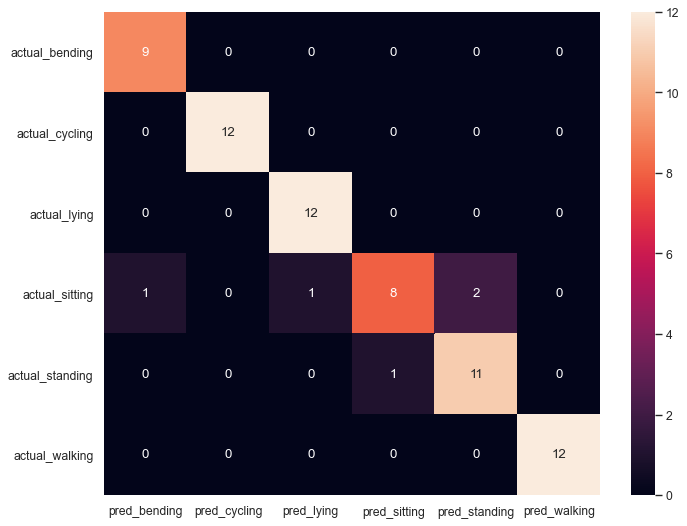

In [85]:
# Prediction on Train Data

y_pred_train = result.predict(x_train)

# Multi-label Confusion Matrix

cm_multilabel = multilabel_confusion_matrix(y_train, y_pred_train)

print("Train Data Multi-label Confusion Matrix:")
print(cm_multilabel)

# Confusion Matrix

cm = pd.DataFrame(confusion_matrix(y_train, y_pred_train), 
             columns=['pred_bending','pred_cycling','pred_lying','pred_sitting','pred_standing','pred_walking'], 
             index=['actual_bending','actual_cycling','actual_lying','actual_sitting','actual_standing','actual_walking'])

print('\n')
print("Train Data Confusion Matrix:")

figure(figsize=(10,8), dpi=80)

sns.heatmap(cm, annot=True)

In [86]:
# Train Data Performance Measures

d = {'Accuracy': [accuracy_score(y_train, y_pred_train)] , 'Error' : [1-(accuracy_score(y_train, y_pred_train))], 'F1 Score': [f1_score(y_train, y_pred_train,average='weighted')]}
df_measures = pd.DataFrame(data=d,index=['Train Data Performance Measures'])
df_measures.T

,Train Data Performance Measures
Accuracy,0.927536
Error,0.072464
F1 Score,0.923901


Test Data Multi-label Confusion Matrix:
[[[15  0]
  [ 0  4]]

 [[16  0]
  [ 0  3]]

 [[16  0]
  [ 0  3]]

 [[15  1]
  [ 1  2]]

 [[15  1]
  [ 1  2]]

 [[16  0]
  [ 0  3]]]


Test Data Confusion Matrix:


<AxesSubplot:>

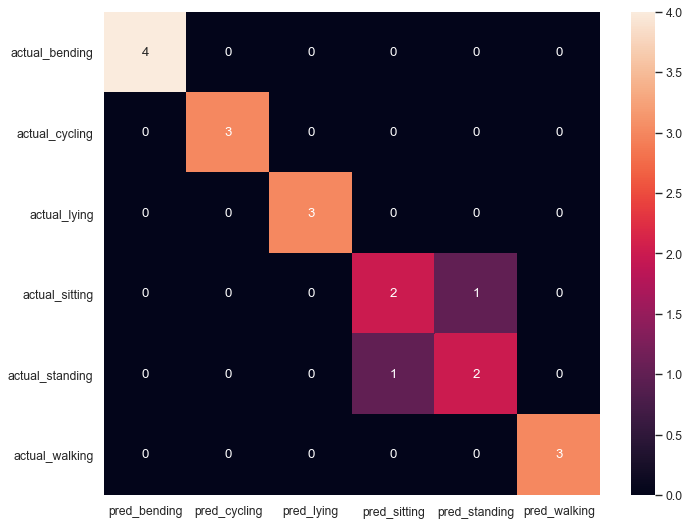

In [87]:
# Prediction on Test Data

y_pred_test = result.predict(x_test)

# Multi-label Confusion Matrix

cm_multilabel = multilabel_confusion_matrix(y_test, y_pred_test)

print("Test Data Multi-label Confusion Matrix:")
print(cm_multilabel)

# Confusion Matrix

cm = pd.DataFrame(confusion_matrix(y_test, y_pred_test), 
             columns=['pred_bending','pred_cycling','pred_lying','pred_sitting','pred_standing','pred_walking'], 
             index=['actual_bending','actual_cycling','actual_lying','actual_sitting','actual_standing','actual_walking'])

print('\n')
print("Test Data Confusion Matrix:")

figure(figsize=(10,8), dpi=80)

sns.heatmap(cm, annot=True)

In [88]:
# Test Data Performance Measures

d = {'Accuracy': [accuracy_score(y_test, y_pred_test)] , 'Error' : [1-(accuracy_score(y_test, y_pred_test))], 'F1 Score': [f1_score(y_test, y_pred_test,average='weighted')]}
df_measures = pd.DataFrame(data=d,index=['Test Data Performance Measures'])
df_measures.T

,Test Data Performance Measures
Accuracy,0.894737
Error,0.105263
F1 Score,0.894737


In [89]:
y_train_1 = y_train.copy(deep=True)
y_test_1 = y_test.copy(deep=True)

# Assign a number to each class

y_train_1['Activity'] = np.where(((y_train_1['Activity']=='bending1') | (y_train_1['Activity']=='bending2')),'bending',y_train_1['Activity'])

y_train_1['Activity'] = np.where((y_train_1['Activity']=='bending'),0,y_train_1['Activity'])
y_train_1['Activity'] = np.where((y_train_1['Activity']=='cycling'),1,y_train_1['Activity'])
y_train_1['Activity'] = np.where((y_train_1['Activity']=='lying'),2,y_train_1['Activity'])
y_train_1['Activity'] = np.where((y_train_1['Activity']=='sitting'),3,y_train_1['Activity'])
y_train_1['Activity'] = np.where((y_train_1['Activity']=='standing'),4,y_train_1['Activity'])
y_train_1['Activity'] = np.where((y_train_1['Activity']=='walking'),5,y_train_1['Activity'])

y_test_1['Activity'] = np.where(((y_test_1['Activity']=='bending1') | (y_test_1['Activity']=='bending2')),'bending',y_test_1['Activity'])

y_test_1['Activity'] = np.where((y_test_1['Activity']=='bending'),0,y_test_1['Activity'])
y_test_1['Activity'] = np.where((y_test_1['Activity']=='cycling'),1,y_test_1['Activity'])
y_test_1['Activity'] = np.where((y_test_1['Activity']=='lying'),2,y_test_1['Activity'])
y_test_1['Activity'] = np.where((y_test_1['Activity']=='sitting'),3,y_test_1['Activity'])
y_test_1['Activity'] = np.where((y_test_1['Activity']=='standing'),4,y_test_1['Activity'])
y_test_1['Activity'] = np.where((y_test_1['Activity']=='walking'),5,y_test_1['Activity'])

y_train_1 = y_train_1.astype(int)
y_test_1 = y_test_1.astype(int)

y_train_1 = y_train_1.to_numpy().flatten()
y_test_1 = y_test_1.to_numpy().flatten()

# Binarize all the classes

y_train_bin = label_binarize(y_train_1, classes=[0,1,2,3,4,5])
y_test_bin = label_binarize(y_test_1, classes=[0,1,2,3,4,5])
n_classes = 6

x_train_1 = x_train.values
x_test_1 = x_test.values

# OneVsRestClassifier

clf = OneVsRestClassifier(mnb)

y_train_score = clf.fit(x_train_1, y_train_bin).predict(x_train_1)
y_test_score = clf.fit(x_train_1, y_train_bin).predict(x_test_1)

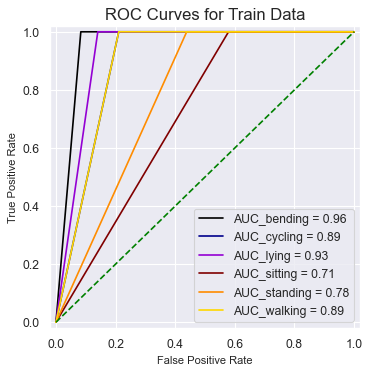

In [90]:
# ROC Curves for Train Data for each of the classes

from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

activities = {0:'bending',1:'cycling',2:'lying',3:'sitting',4:'standing',5:'walking'}
colours = ['black','darkblue','darkviolet','maroon','darkorange','gold']

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_bin[:, i], y_train_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

figure(figsize=(5, 5), dpi=80)
plt.title('ROC Curves for Train Data', fontsize = 15)
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label = 'AUC_{} = %0.2f'.format(activities[i]) % roc_auc[i], color=colours[i])

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color='green')
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.ylabel('True Positive Rate',fontsize = 10)
plt.xlabel('False Positive Rate',fontsize = 10)
plt.show()

In [91]:
# AUC for Train Data

auc_scores = []

for i in range(n_classes):
    auc_scores.append(roc_auc[i])
    
# AUC will be the mean of the AUCs of all classes

auc = np.mean(auc_scores)

d = {'AUC': [auc]}
df_measures = pd.DataFrame(data=d,index = ['Train Data Performance Measures'])
df_measures.T

,Train Data Performance Measures
AUC,0.861477


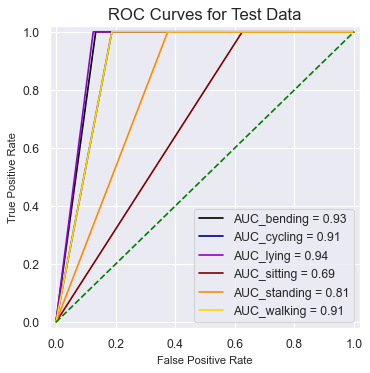

In [92]:
# ROC Curves for Test Data for each of the classes

from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

activities = {0:'bending',1:'cycling',2:'lying',3:'sitting',4:'standing',5:'walking'}
colours = ['black','darkblue','darkviolet','maroon','darkorange','gold']

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

figure(figsize=(5, 5), dpi=80)
plt.title('ROC Curves for Test Data', fontsize = 15)
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label = 'AUC_{} = %0.2f'.format(activities[i]) % roc_auc[i], color=colours[i])

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color='green')
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.ylabel('True Positive Rate',fontsize = 10)
plt.xlabel('False Positive Rate',fontsize = 10)
plt.show()

In [93]:
# AUC for Test Data

auc_scores = []

for i in range(n_classes):
    auc_scores.append(roc_auc[i])
    
# AUC will be the mean of the AUCs of all classes

auc = np.mean(auc_scores)

d = {'AUC': [auc]}
df_measures = pd.DataFrame(data=d,index = ['Test Data Performance Measures'])
df_measures.T

,Test Data Performance Measures
AUC,0.863889


# (f) iii. Which method is better for multi-class classification in this problem?

For multi-class classification,

Test accuracies of the classifiers are as follows:

L1-penalized Logistic Regression: 1
Gaussian Naive Bayes: 0.842105
Multinomial Naive Bayes: 0.894737

F1-scores of the classifiers are as follows:

L1-penalized Logistic Regression: 1
Gaussian Naive Bayes: 0.829240
Multinomial Naive Bayes: 0.894737

From the test accuracy and the F1-score perspective, the L1-penalized multinomial regression model is the winner, followed by Multinomial Naive Bayes. (subject to the set random state also) 

From computation perspective however, the Naive Bayes is better than the L1-penalized Logistic Regression model.The L1-penalized Logistic Regression model because of our small sample size (only 69 instances in training set) suffers and worsens as l becomes larger.Naive Bayes however handles this situation well because of the fact that we assume zero conditional correlation among the features.The computation time of Multinomial Naive Bayes hence is much lesser than that of L1-penalized Logistic Regression.

However using L1-penalized logistic regression might have more tendency to cause a more varying error compared to the two Naive Bayes classifiers. With multi-class classification, it might be better using Multinomial Naive Bayes Classifier as it is a more stable way of making the prediction.

# 2. ISLR 3.7.4

# I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. Y = β0 + β1X + β2X2 + β3X3 + E.

# (a) Suppose that the true relationship between X and Y is linear, i.e. Y = β0 + β1X + E. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

I would expect the training RSS for the cubic regression to be lower since a polynomial model always fits to the data better.
But since the true relationship between X and Y is linear, it is also possible that the least squares line for the linear regression fits more perfectly to the data and is closer to the true regression line and hence the training RSS for the linear regression is lower. 
It is therefore difficult to tell.

# (b) Answer (a) using test rather than training RSS.

Since the true relationship between X and Y is linear, I would expect the test RSS for the cubic regression to be more since the model in this case would tend to overfit to the training data and hence result in higher RSS.

# (c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

In this case, since the true relationship between X and Y is not linear but we don’t know how far it is from linear, I would expect the training RSS for the cubic regression to be lower since the model in this case would fit better to the training data as it is a more flexible model and hence result in lower RSS.

# (d) Answer (c) using test rather than training RSS.

There is not enough information to tell whether the test RSS for the linear regression is lower or the test RSS for the cubic regression is lower. In this case, since the true relationship between X and Y is not linear but we don’t know how far it is from linear, we cannot make an assumption about it.If the true relationship betweeen X and Y is closer to linear than cubic, I would expect the test RSS for the linear regression to be lower and if the true relationship betweeen X and Y is closer to cubic than linear, I would expect the test RSS for the cubic regression to be lower. It all depends on the exact relationship between X and Y and the bias-variance trade-off therof.

# 3. ISLR, 4.7.3

# This problem relates to the QDA model, in which the observations within each class are drawn from a normal distribution with a class specific mean vector and a class specific covariance matrix. We consider the simple case where p = 1; i.e. there is only one feature. Suppose that we have K classes, and that if an observation belongs to the kth class then X comes from a one-dimensional normal distribution, X ∼ N(μk, σ2 k). Recall that the density function for the one-dimensional normal distribution is given in (4.11). Prove that in this case, the Bayes’ classifier is not linear. Argue that it is in fact quadratic. Hint: For this problem, you should follow the arguments laid out in Section 4.4.2, but without making the assumption that σ2 1 = . . . = σ2K .

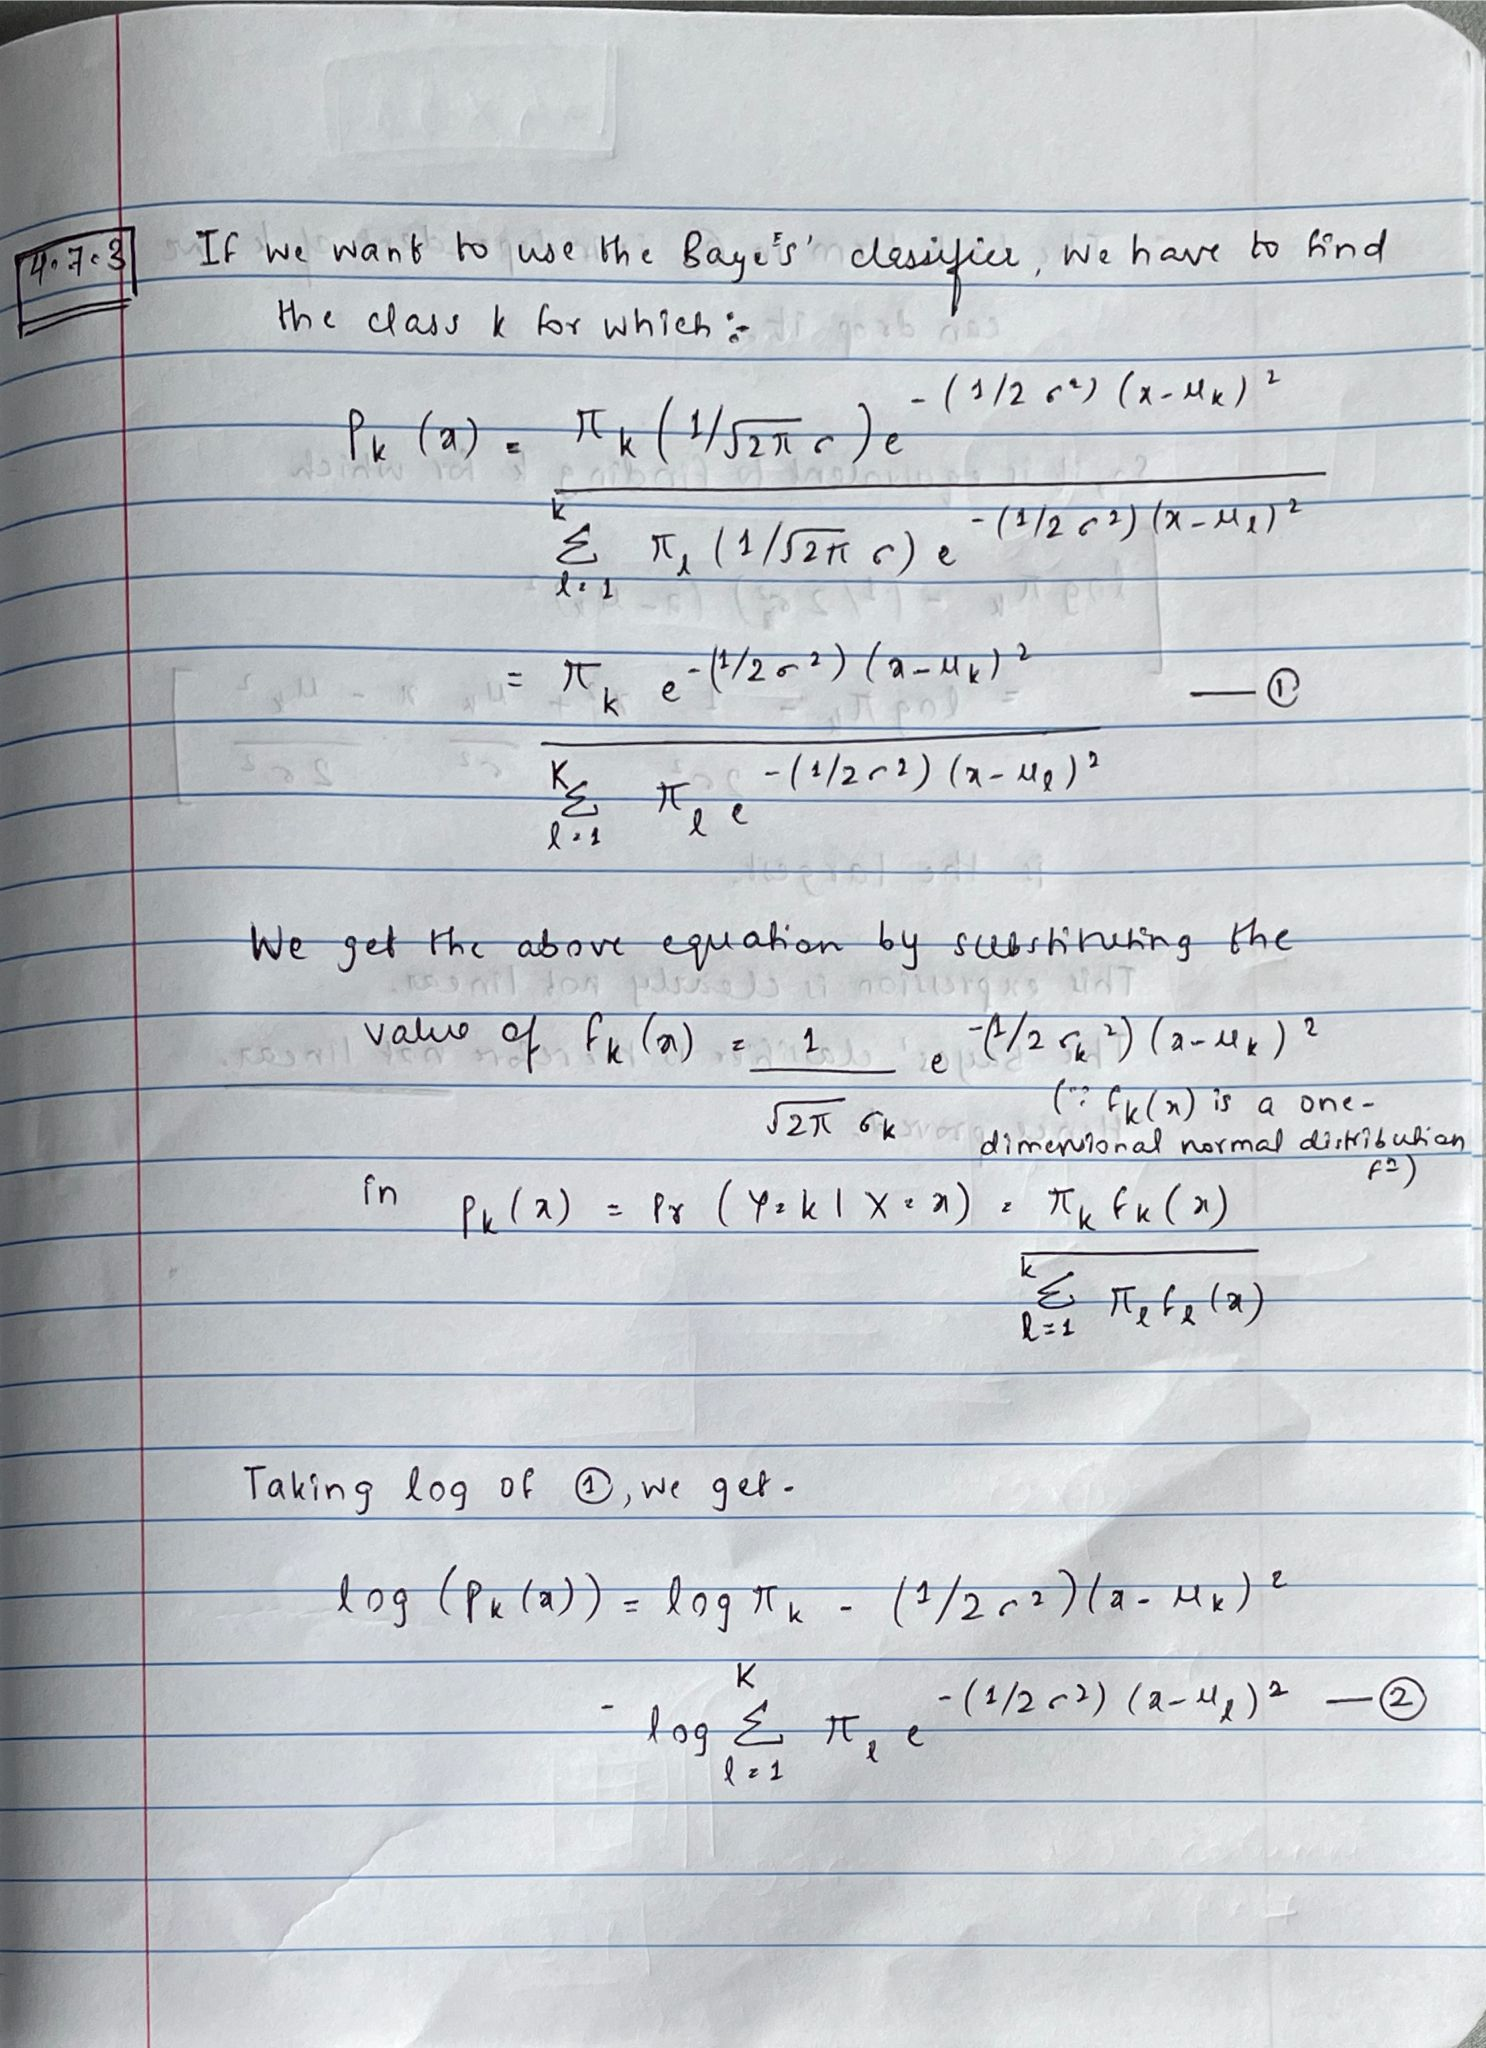

In [94]:
Image(filename="../notebook/images/1.jpeg")

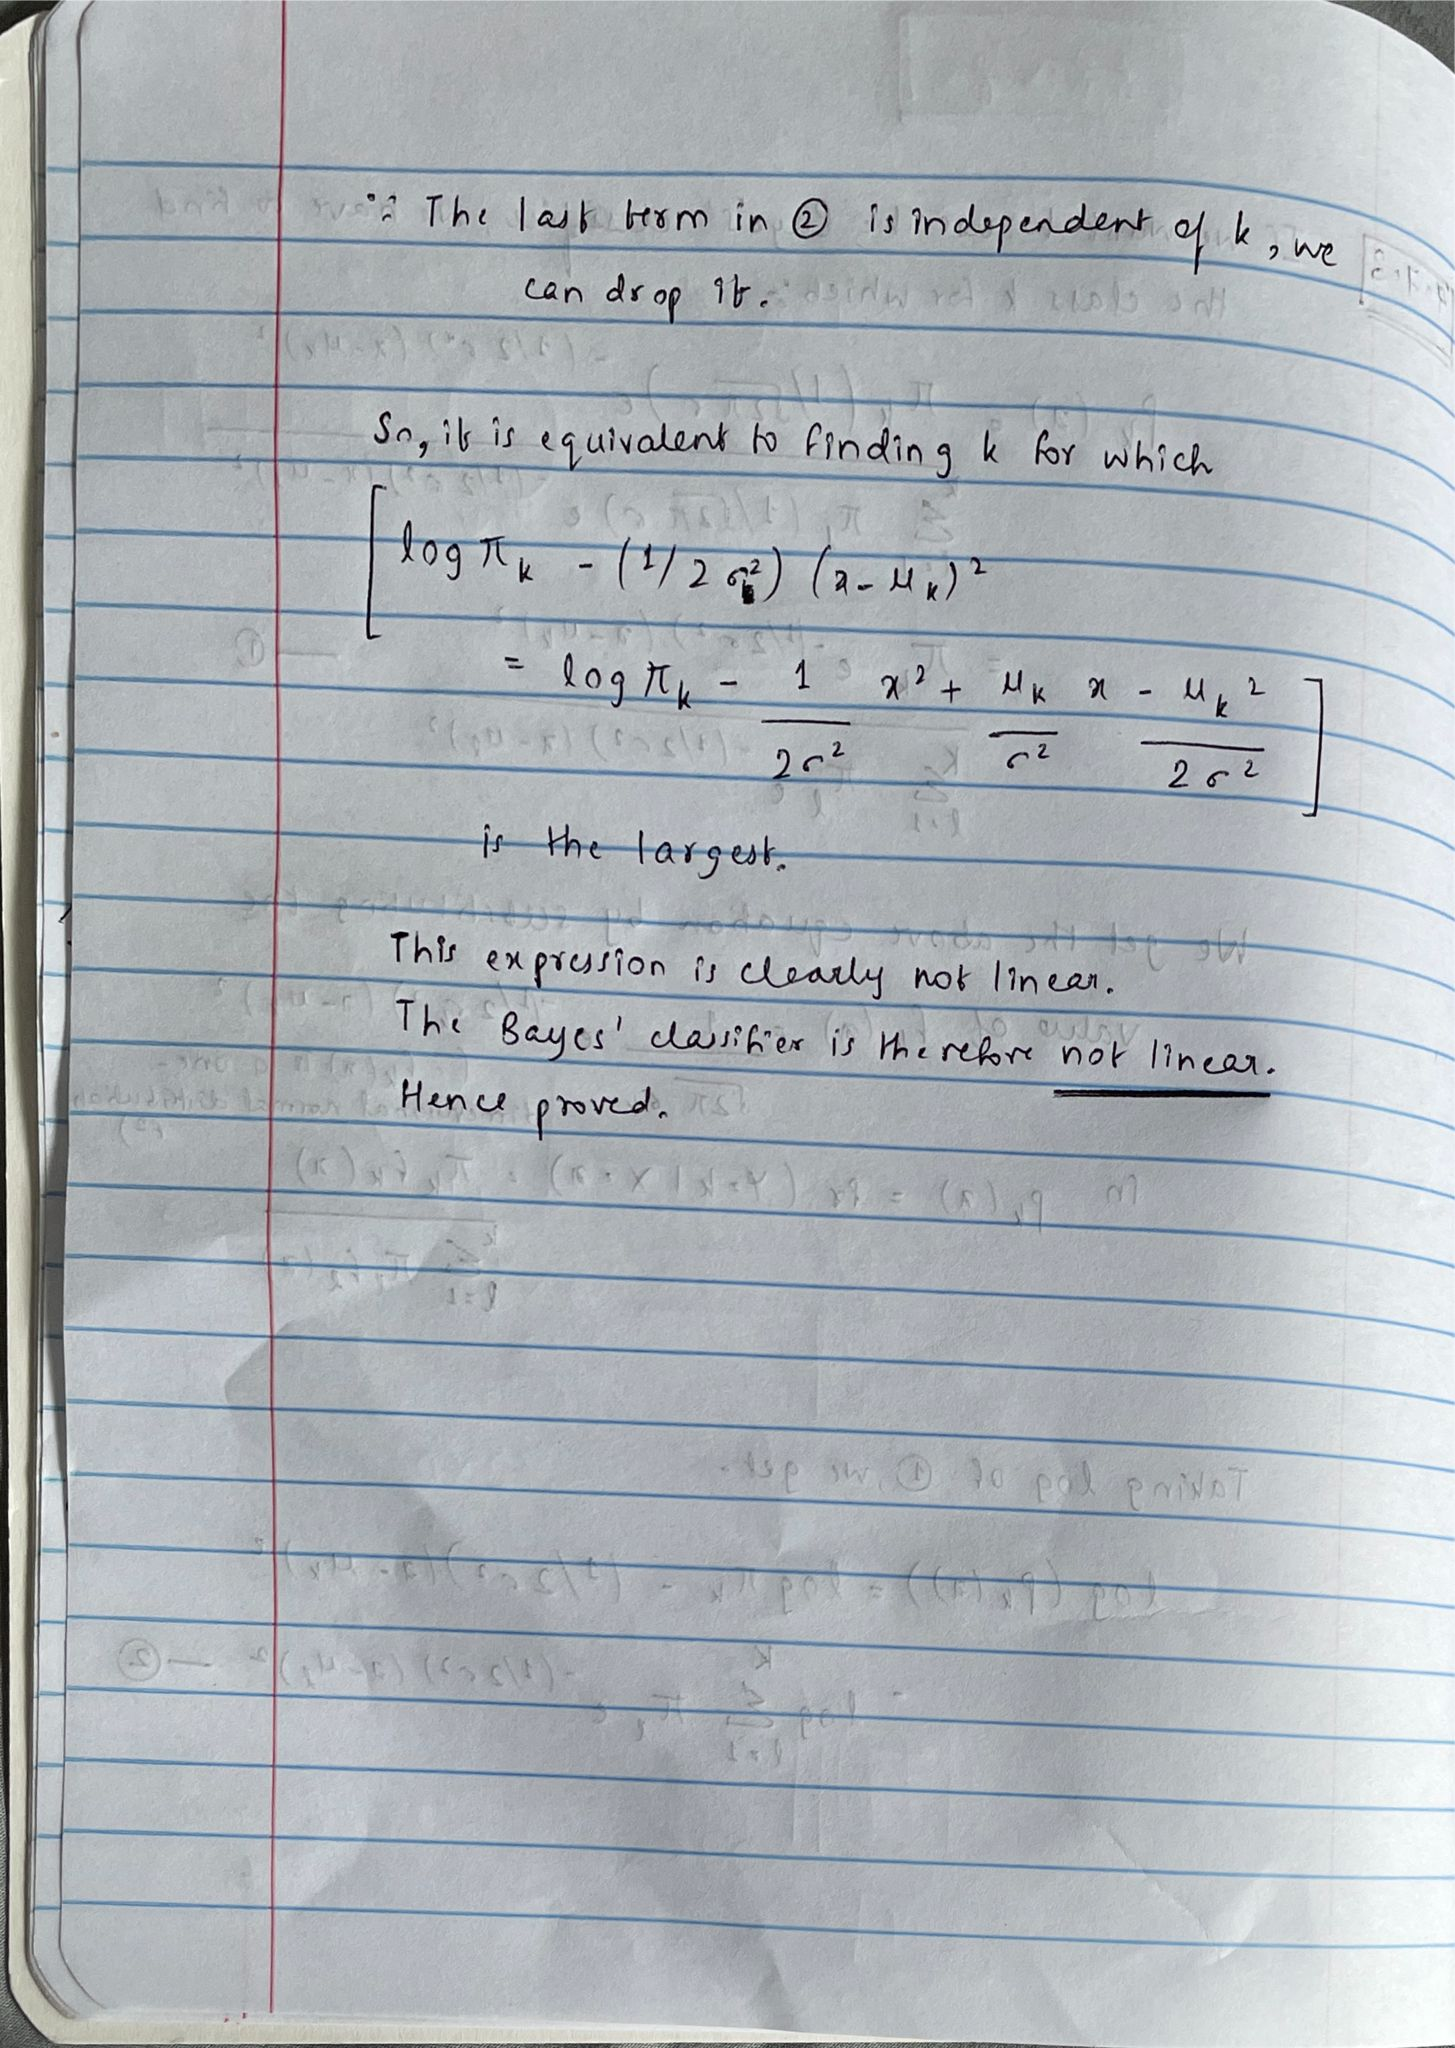

In [95]:
Image(filename="../notebook/images/2.jpeg")

# 4. ISLR 4.7.7

# Suppose that we wish to predict whether a given stock will issue a dividend this year (“Yes” or “No”) based on X, last year’s percent profit.We examine a large number of companies and discover that the mean value of X for companies that issued a dividend was ¯X = 10, while the mean for those that didn’t was ¯X = 0. In addition, the variance of X for these two sets of companies was ˆσ2 = 36. Finally, 80% of companies issued dividends. Assuming that X follows a normal distribution, predict the probability that a company will issue a dividend this year given that its percentage profit was X = 4 last year. Hint: Recall that the density function for a normal random variable is f(x) = √ 1 2πσ2 e−(x−μ)2/2σ2 . You will need to use Bayes’ theorem.

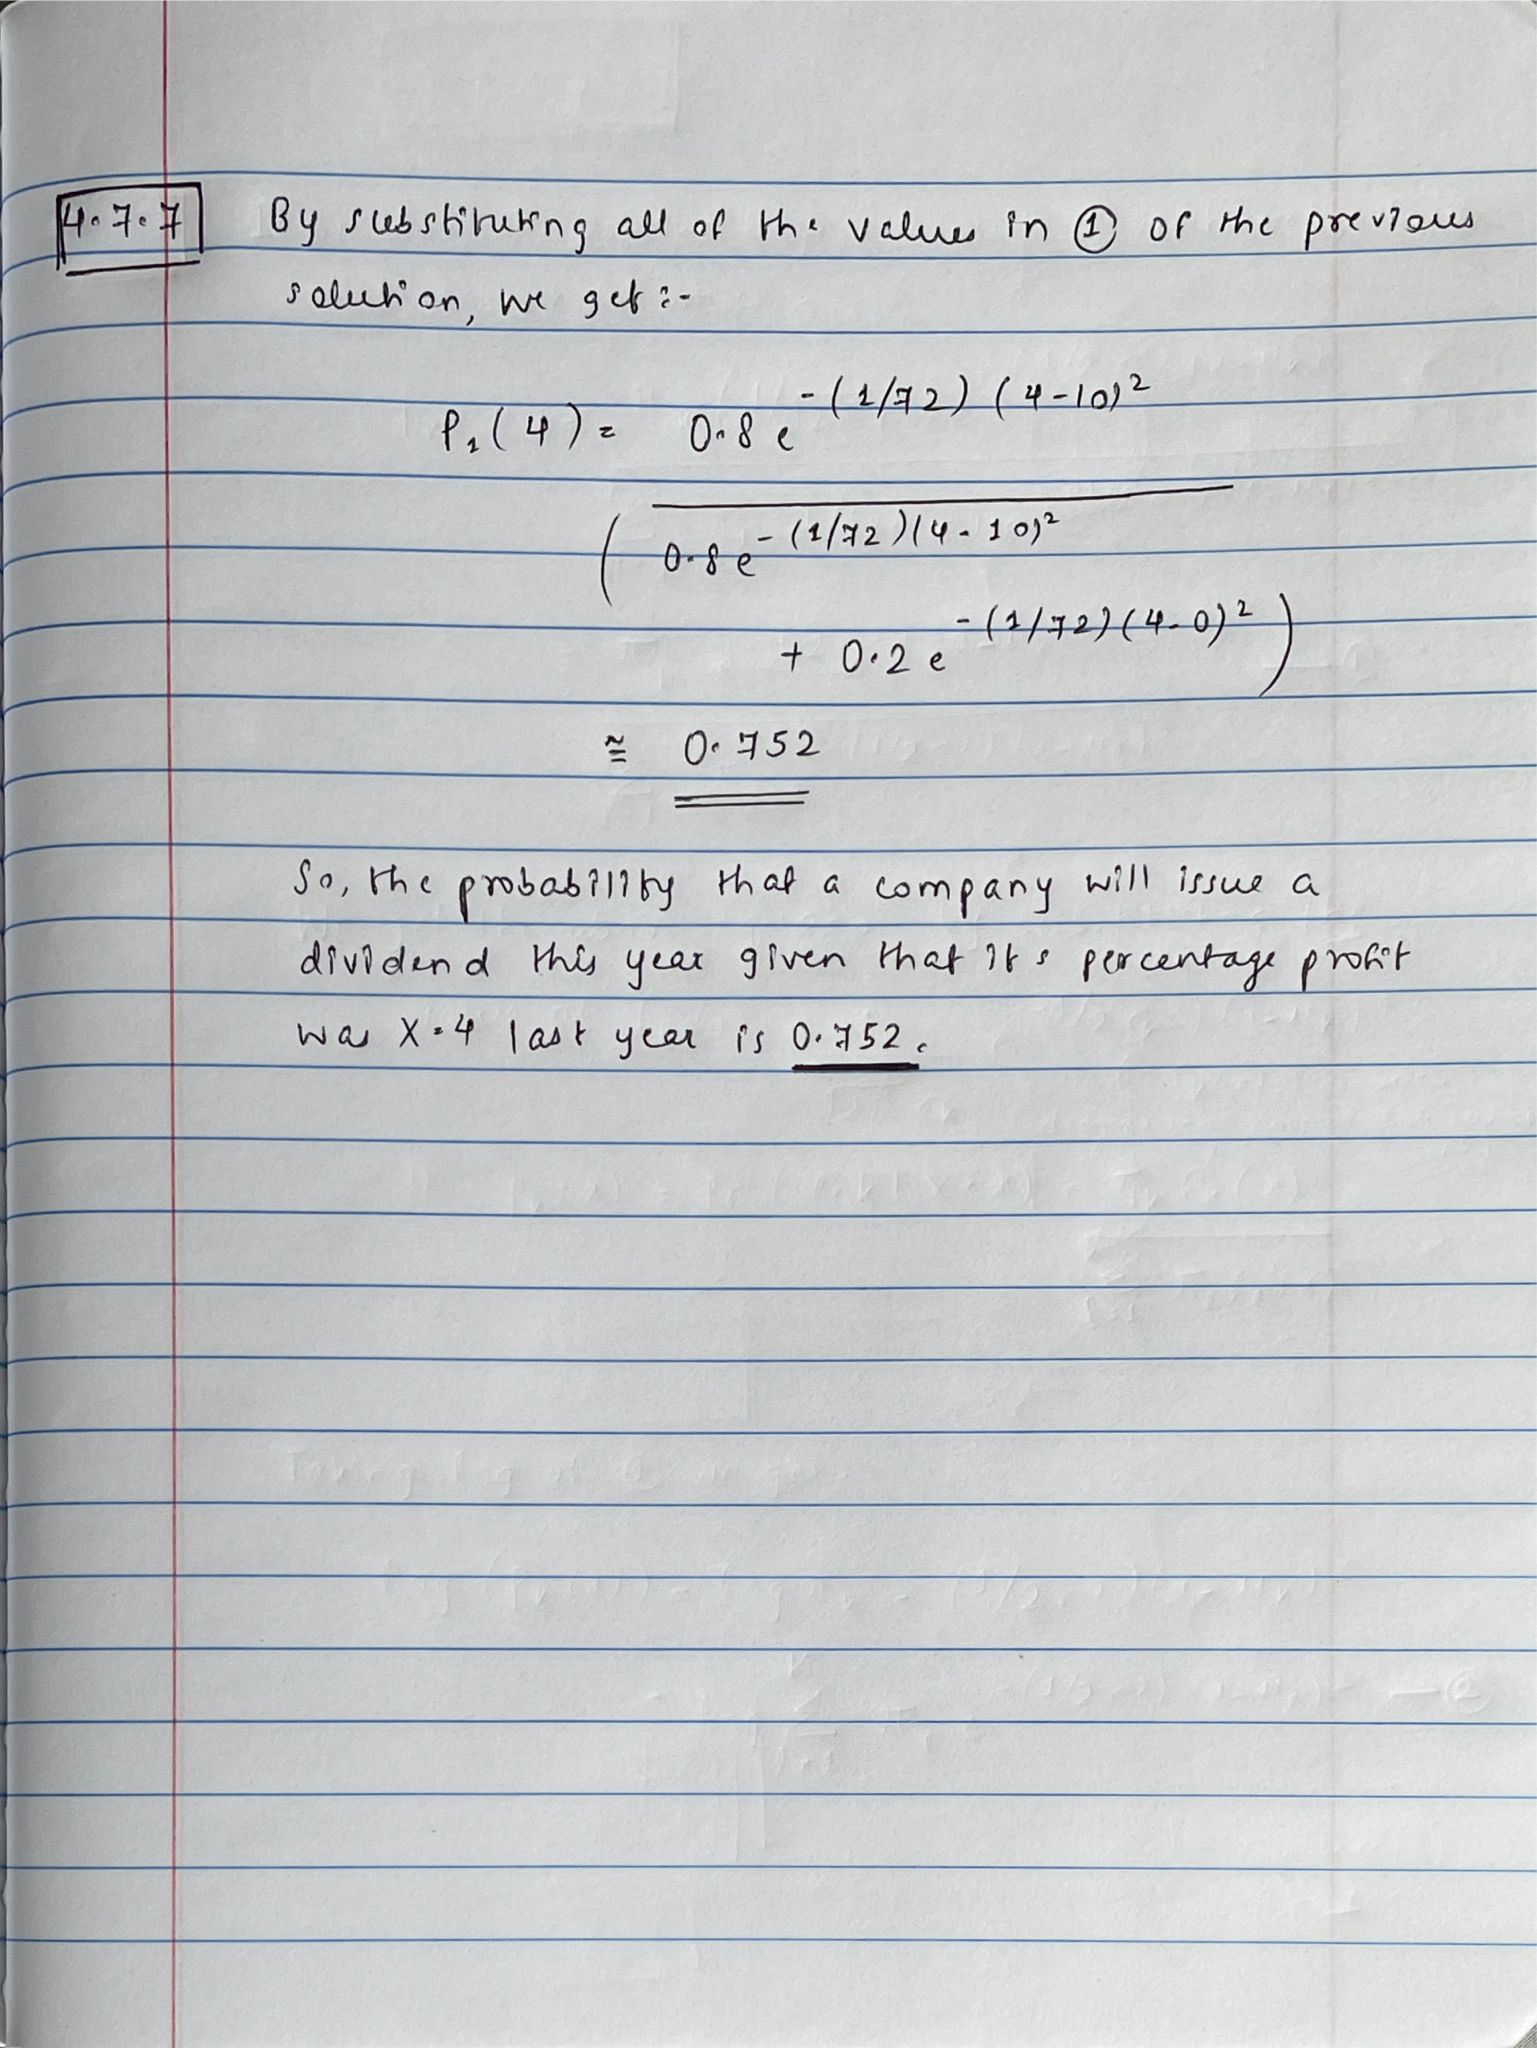

In [96]:
Image(filename="../notebook/images/3.jpeg")